In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [2]:
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import base_network as base_network
import ring_network as ring_network
import spat_ori_network as network
import sim_util as su
import ricciardi as ric
import integrate as integ

def imshowbar(fig,ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

# Read Base Results Files

In [40]:
max_njob = 200

res_dict = {}
id_res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_base_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            id_res_dict[(njob,idx_rep)] = this_res_dict[idx_rep]
            nsim += 1
    except:
        pass

print(nsim)

1311


In [41]:
prms = np.zeros((nsim,11))
inputs = np.zeros((nsim,9))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_eX']],[res_dict[idx_sim]['best_bX']],
                                      res_dict[idx_sim]['best_aXs']))
    costs[idx_sim] = res_dict[idx_sim]['best_cost']

In [42]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(res_dict[idx_min]['best_eX'])
print(res_dict[idx_min]['best_bX'])
print(res_dict[idx_min]['best_aXs'])
print(res_dict[idx_min]['best_means'])
print(res_dict[idx_min]['best_stds'])
print(res_dict[idx_min]['best_cost'])

(118, 5)
{'SrfE': 12.940111969332282, 'SrfI': 19.459208800703315, 'SrfF': 20, 'SoriE': 36.907244273244515, 'SoriI': 33.51951281695162, 'SoriF': 43.928905500358894, 'fEE': 0.886025501863603, 'fEI': 1.2361959979943369, 'fIE': 0.7503831441376321, 'fII': 1.0810860686494903, 'fFI': 0.8912578013409655}
0.49999999999847367
2.6102168236880745
[0.         0.25481409 0.37694752 0.53751669 0.56795482 1.52808744
 3.46419408]
[ 6.62042035  7.23251091  7.5258884   7.91159263  7.98470826 10.29104898
 15.88062207]
[ 5.68310787  6.3092617   6.60937976  7.00394586  7.07874139  9.43807213
 15.02580984]
0.9938180626068223


# Read Opto Results Files

In [87]:
max_njob = 200

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_opto_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

813


In [88]:
prms = np.zeros((nsim,11))
inputs = np.zeros((nsim,2))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_L']],[res_dict[idx_sim]['best_CVL']]))
    costs[idx_sim] = res_dict[idx_sim]['best_cost'] + id_res_dict[res_dict[idx_sim]['id']]['best_cost']
    costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
        else 1

In [89]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_eX'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_bX'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_aXs'])
print(res_dict[idx_min]['best_L'])
print(res_dict[idx_min]['best_CVL'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_means'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_stds'])
print(res_dict[idx_min]['best_opto_means'])
print(res_dict[idx_min]['best_opto_stds'])
print(res_dict[idx_min]['best_diff_means'])
print(res_dict[idx_min]['best_diff_stds'])
print(res_dict[idx_min]['best_norm_covs'])
# print(res_dict[idx_min]['best_cost'] + id_res_dict[res_dict[idx_sim]['id']]['best_cost'])
print(costs[idx_min])

(84, 0)
{'SrfE': 15.7538486994389, 'SrfI': 7.046622992595769, 'SrfF': 20, 'SoriE': 24.953877993731425, 'SoriI': 38.12048547450283, 'SoriF': 36.75758272019653, 'fEE': 0.9609543331794965, 'fEI': 1.086519954916826, 'fIE': 0.9911424325463908, 'fII': 1.2252079589178013, 'fFI': 1.2014852358170565}
0.49999999999262096
2.5595960598498584
[0.         0.38566975 0.57793687 0.8321163  0.87109781 2.25731141
 5.00923031]
2.23158283227162
1.778279414270379
[ 6.80984158  7.32339518  7.57941597  7.91787851  7.96978586  9.89367612
 14.52970854]
[ 5.69153654  6.30835027  6.61584911  7.02236625  7.08471059  9.4959045
 16.18880405]
[10.33878627 10.96994928 11.27091742 11.67574667 11.74358565 14.32587743
 20.07854425]
[10.06069272 10.4790371  10.69050148 10.98620252 11.03695812 13.17753959
 18.73136926]
[3.95992366 4.07144156 4.1213966  4.18550426 4.19593014 4.5316352
 4.98703814]
[8.2034326  8.29458033 8.33565555 8.38860427 8.39722868 8.67952918
 9.07073767]
[0.04174232 0.04753108 0.05052136 0.05471933 0.

# Read Comb Results Files

In [90]:
max_njob = 200

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_comb_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

507


In [91]:
prms = np.zeros((nsim,13))
inputs = np.zeros((nsim,9))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_eX']],[res_dict[idx_sim]['best_bX']],
                                      res_dict[idx_sim]['best_aXs']))
    costs[idx_sim] = res_dict[idx_sim]['best_cost']
    costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
        else 1

In [92]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(res_dict[idx_min]['best_eX'])
print(res_dict[idx_min]['best_bX'])
print(res_dict[idx_min]['best_aXs'])
print(res_dict[idx_min]['best_base_means'])
print(res_dict[idx_min]['best_base_stds'])
print(res_dict[idx_min]['best_opto_means'])
print(res_dict[idx_min]['best_opto_stds'])
print(res_dict[idx_min]['best_diff_means'])
print(res_dict[idx_min]['best_diff_stds'])
print(res_dict[idx_min]['best_norm_covs'])
# print(res_dict[idx_min]['best_cost'])
print(costs[idx_min])

(45, 2)
{'SrfE': 10.550152081539142, 'SrfI': 16.07865249050877, 'SrfF': 30, 'SoriE': 28.184809695055524, 'SoriI': 30.21989163195262, 'SoriF': 39.15714170801061, 'fEE': 1.0506607239469055, 'fEI': 0.7467693106136719, 'fIE': 0.9187698061837739, 'fII': 0.8254365414159728, 'fFI': 1.3917451440450372, 'L': 2.8037678888031996, 'CVL': 1.4346284857676583}
0.5399859632931963
2.372266912228103
[0.         0.1593714  0.25965879 0.43302212 0.51366734 1.10942887
 2.91251707]
[ 6.52127529  6.94659229  7.21423085  7.67688835  7.89210752  9.48202584
 14.29395615]
[ 5.55592329  6.02652041  6.32265233  6.8345653   7.07269714  8.83188145
 14.15609979]
[11.06714501 11.57496653 11.8945226  12.44692807 12.70389623 14.60223265
 20.34759858]
[10.52801663 10.93750511 11.1951833  11.64062263 11.84783225 13.37858051
 18.01143102]
[4.54586972 4.62837425 4.68029175 4.77003972 4.81178871 5.12020681
 6.05364243]
[7.8861239  7.93682822 7.96873485 8.02389073 8.04954817 8.23909086
 8.81274687]
[0.10188507 0.11088002 0.11

# Read Ring Results Files

In [3]:
max_njob = 400

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_ring_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(np.fmin(7,max_rep)):
#         for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

1533


In [4]:
prms = np.zeros((nsim,12))
mous_inputs = np.zeros((nsim,9))
monk_inputs = np.zeros((nsim,8))
mous_costs = np.zeros((nsim))
monk_costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    mous_inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_mous_eX']],[res_dict[idx_sim]['best_mous_bX']],
                                      res_dict[idx_sim]['best_mous_aXs']))
    monk_inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_monk_eX']],[res_dict[idx_sim]['best_monk_bX']],
                                      res_dict[idx_sim]['best_monk_aXs']))
    mous_costs[idx_sim] = res_dict[idx_sim]['best_mous_cost']
    monk_costs[idx_sim] = res_dict[idx_sim]['best_monk_cost']
    mous_costs[idx_sim] *= 1e8 if res_dict[idx_sim]['best_mous_aXs'][-1] < 2 else 1
    monk_costs[idx_sim] *= 1e8 if res_dict[idx_sim]['best_monk_aXs'][-1] < 2 else 1
#     costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
#         else 1

In [5]:
mous_idx_min = np.argmin(mous_costs)

print(res_dict[mous_idx_min]['id'])
print(res_dict[mous_idx_min]['prms'])
print(res_dict[mous_idx_min]['best_mous_eX'])
print(res_dict[mous_idx_min]['best_mous_bX'])
print(res_dict[mous_idx_min]['best_mous_aXs'])
print(res_dict[mous_idx_min]['best_mous_base_means'])
print(res_dict[mous_idx_min]['best_mous_base_stds'])
print(res_dict[mous_idx_min]['best_mous_opto_means'])
print(res_dict[mous_idx_min]['best_mous_opto_stds'])
print(res_dict[mous_idx_min]['best_mous_diff_means'])
print(res_dict[mous_idx_min]['best_mous_diff_stds'])
print(res_dict[mous_idx_min]['best_mous_norm_covs'])
print(res_dict[mous_idx_min]['best_mous_cost'])
# print(mous_costs[mous_idx_min])

mous_preds = np.vstack((res_dict[mous_idx_min]['best_mous_base_means'],
                        res_dict[mous_idx_min]['best_mous_opto_means'],
                        res_dict[mous_idx_min]['best_mous_base_stds'],
                        res_dict[mous_idx_min]['best_mous_opto_stds'],
                        res_dict[mous_idx_min]['best_mous_diff_stds'],
                        res_dict[mous_idx_min]['best_mous_norm_covs'],
                        res_dict[mous_idx_min]['best_mous_diff_means']))

(110, 3)
{'K': 500, 'SoriE': 24.682753684066103, 'SoriI': 17.96306981782058, 'SoriF': 22.845709379375535, 'J': 0.0001707304640838233, 'beta': 1.1912675750373014, 'gE': 4.423432118392213, 'gI': 2.0877254666835294, 'hE': 2.5393611080071294, 'hI': 1.2600200446380132, 'L': 1.6871836413493895, 'CVL': 2.387016965119145}
0.49999997781663097
1.6108159728280496
[0.         0.21440813 0.34658578 0.47793568 0.52196706 1.30815054
 3.73068441]
[ 6.5724646   6.99897658  7.26191134  7.52319951  7.61078906  9.17470677
 12.83123407]
[ 5.71555896  6.37747523  6.78553128  7.19103195  7.32696471  9.75405382
 16.89007734]
[10.67171639 10.99963432 11.20178812 11.40267598 11.47001801 12.67241485
 15.64972034]
[10.60076465 11.01104995 11.26398134 11.51532878 11.59958598 13.10400431
 18.55467626]
[4.09925083 4.00065678 3.93987583 3.87947551 3.85922799 3.49770712
 2.81848662]
[7.46400634 7.47494587 7.48168983 7.48839157 7.49063814 7.53075078
 7.48629923]
[0.07099398 0.06907424 0.06789077 0.06671471 0.06632047 0

In [6]:
monk_idx_min = np.argmin(monk_costs)

print(res_dict[monk_idx_min]['id'])
print(res_dict[monk_idx_min]['prms'])
print(res_dict[monk_idx_min]['best_monk_eX'])
print(res_dict[monk_idx_min]['best_monk_bX'])
print(res_dict[monk_idx_min]['best_monk_aXs'])
print(res_dict[monk_idx_min]['best_monk_base_means'])
print(res_dict[monk_idx_min]['best_monk_base_stds'])
print(res_dict[monk_idx_min]['best_monk_opto_means'])
print(res_dict[monk_idx_min]['best_monk_opto_stds'])
print(res_dict[monk_idx_min]['best_monk_diff_means'])
print(res_dict[monk_idx_min]['best_monk_diff_stds'])
print(res_dict[monk_idx_min]['best_monk_norm_covs'])
print(res_dict[monk_idx_min]['best_monk_cost'])
# print(monk_costs[monk_idx_min])

monk_preds = np.vstack((res_dict[monk_idx_min]['best_monk_base_means'],
                        res_dict[monk_idx_min]['best_monk_opto_means'],
                        res_dict[monk_idx_min]['best_monk_base_stds'],
                        res_dict[monk_idx_min]['best_monk_opto_stds'],
                        res_dict[monk_idx_min]['best_monk_diff_stds'],
                        res_dict[monk_idx_min]['best_monk_norm_covs'],
                        res_dict[monk_idx_min]['best_monk_diff_means']))

(133, 0)
{'K': 500, 'SoriE': 29.269409297646355, 'SoriI': 21.638275559749225, 'SoriF': 21.755331006307276, 'J': 0.00014202049283964878, 'beta': 0.17869684881276052, 'gE': 6.98870576346838, 'gI': 4.769591405676211, 'hE': 3.478974226457212, 'hI': 0.5068692630228363, 'L': 2.4437935154537884, 'CVL': 8.127033188584456}
0.04999999929033998
5.235970487994746
[ 0.          5.58471835  7.50231291  9.33738735 10.10183591 10.97337725]
[16.01187489 41.06751309 49.68886304 57.88103182 61.27281079 65.10154754]
[16.31647776 36.79537529 42.96983022 48.19743811 50.28129592 52.5067633 ]
[18.16536974 42.58928647 51.33142699 59.36082305 62.68654025 66.66643799]
[25.19999614 41.79962649 46.73805875 52.35622493 54.7615842  56.68461311]
[2.15349711 1.52177418 1.64256619 1.47979115 1.41372788 1.56488858]
[22.10530702 28.95859908 27.30005568 28.97099522 30.07682998 29.62257975]
[-0.12681597 -0.26497158 -0.27417977 -0.25085092 -0.23885168 -0.23733376]
33.03577263158608


In [31]:
font = {'family' : 'normal', 'weight' : 'normal', 'size' : 7, 'family' : 'serif', 'serif' : ['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

with open('./data_moments'+'.pkl', 'rb') as handle:
    data_moments = pickle.load(handle)
with open('./data_contrasts'+'.pkl', 'rb') as handle:
    data_contrasts = pickle.load(handle)

def plot_preds(preds,output_dir,name_end,animal='both',preds_aux=None,plot_delta_r=False):

    if animal=='both':
        animal_idxs=[0,1]
    elif animal in ('mouse','Mouse'):
        animal_idxs=[0]
    elif animal in ('monkey','Monkey'):
        animal_idxs=[1]

    if plot_delta_r:
        rows=5
        n_moment=7
    else:
        rows=4
        n_moment=6
    cols=len(animal_idxs)
    colors=['c','m']
    color_sim=['xkcd:aqua','xkcd:coral']
    fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), dpi=300, facecolor='w', edgecolor='k',
                            sharex=True)
    fig.subplots_adjust(hspace = .5, wspace=.5)
    axs = axs.ravel()
    this_animals=['mouse','monkey']
    
    for idx,anim_idx in enumerate(animal_idxs):
        dataset=data_moments[anim_idx]
        contrast=data_contrasts[anim_idx]
        if preds[0].ndim==2:
            predictions=preds[anim_idx]
            if preds_aux is not None:
                predictions_aux=preds_aux[anim_idx]
        else:
            predictions=preds
            if preds_aux is not None:
                predictions_aux=preds_aux
        for idx_moment in range(n_moment):
            if idx_moment<2:
                idx_row=0
                ccc=['k',colors[anim_idx]][idx_moment]
                ccd=['k',color_sim[anim_idx]][idx_moment]
                ymin=0
                ymax=[25,80][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[0,1]].flatten())
                ylabel='Mean rate (spk/s)'

            if (idx_moment>=2)&(idx_moment<4):
                idx_row=1
                ccc=['k',colors[anim_idx]][idx_moment-2]
                ccd=['k',color_sim[anim_idx]][idx_moment-2]
                ymin=0
                ymax=[20,60][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[2,3]].flatten())
                ylabel='Std rate (spk/s)'

            if (idx_moment==4):
                idx_row=2
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=0
                ymax=[20,60][anim_idx]
                ylabel='Std Δrate (spk/s)'

            if (idx_moment==5):
                idx_row=3
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=-0.75
                ymax=0.25
                ylabel='ρ'

            if (idx_moment==6):
                idx_row=4
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=[-5,-10][anim_idx]
                ymax=[20,30][anim_idx]
                ylabel='Mean Δrate (spk/s)'
            
            m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
            axs[cols*idx_row+idx].scatter(contrast,m,facecolors='none', s=10,edgecolors=ccc,marker='o')
            axs[cols*idx_row+idx].fill_between(contrast,m-sem,m+sem,color=ccc,alpha=0.2)
            axs[cols*idx_row+idx].plot(contrast,predictions[:,idx_moment],color=ccc,alpha=1.)
            if preds_aux is not None:
                axs[cols*idx_row+idx].plot(contrast,predictions_aux[:,idx_moment],color=ccc,ls='--',alpha=1.)
#            if all_moments not None:
            if idx_moment >= 5:
                axs[cols*idx_row+idx].axhline(y=0,ls='--',c='k')

            axs[cols*idx_row+idx].set_xscale('symlog', linthresh=12)
            axs[cols*idx_row+idx].set_ylim([ymin,ymax])
            axs[cols*idx_row+idx].set_xlabel('contrast (%)')
            axs[cols*idx_row+idx].set_ylabel(ylabel)


    print('Done')

    fig.tight_layout()
    fig.savefig(output_dir+'/preds_'+name_end+'.pdf', bbox_inches='tight')
    
def plot_preds_with_bal(preds,bals,optrs,output_dir,name_end,animal='both',
                        preds_aux=None,bals_aux=None,optrs_aux=None,plot_delta_r=False):

    if animal=='both':
        animal_idxs=[0,1]
    elif animal in ('mouse','Mouse'):
        animal_idxs=[0]
    elif animal in ('monkey','Monkey'):
        animal_idxs=[1]

    if plot_delta_r:
        rows=7
        n_moment=7
    else:
        rows=6
        n_moment=6
    cols=len(animal_idxs)
    colors=['c','m']
    color_sim=['xkcd:aqua','xkcd:coral']
    fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), dpi=300, facecolor='w', edgecolor='k',
                            sharex=True)
    fig.subplots_adjust(hspace = .5, wspace=.5)
    axs = axs.ravel()
    this_animals=['mouse','monkey']
    
    for idx,anim_idx in enumerate(animal_idxs):
        dataset=data_moments[anim_idx]
        contrast=data_contrasts[anim_idx]
        if preds[0].ndim==2:
            predictions=preds[anim_idx]
            if preds_aux is not None:
                predictions_aux=preds_aux[anim_idx]
        else:
            predictions=preds
            if preds_aux is not None:
                predictions_aux=preds_aux
        for idx_moment in range(n_moment):
            if idx_moment<2:
                idx_row=0
                ccc=['k',colors[anim_idx]][idx_moment]
                ccd=['k',color_sim[anim_idx]][idx_moment]
                ymin=0
                ymax=[25,80][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[0,1]].flatten())
                ylabel='Mean rate (spk/s)'

            if (idx_moment>=2)&(idx_moment<4):
                idx_row=1
                ccc=['k',colors[anim_idx]][idx_moment-2]
                ccd=['k',color_sim[anim_idx]][idx_moment-2]
                ymin=0
                ymax=[20,60][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[2,3]].flatten())
                ylabel='Std rate (spk/s)'

            if (idx_moment==4):
                idx_row=2
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=0
                ymax=[20,60][anim_idx]
                ylabel='Std Δrate (spk/s)'

            if (idx_moment==5):
                idx_row=3
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=-0.75
                ymax=0.25
                ylabel='ρ'

            if (idx_moment==6):
                idx_row=4
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=[-5,-10][anim_idx]
                ymax=[20,30][anim_idx]
                ylabel='Mean Δrate (spk/s)'
            
            m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
            axs[cols*idx_row+idx].scatter(contrast,m,facecolors='none', s=10,edgecolors=ccc,marker='o')
            axs[cols*idx_row+idx].fill_between(contrast,m-sem,m+sem,color=ccc,alpha=0.2)
            axs[cols*idx_row+idx].plot(contrast,predictions[:,idx_moment],color=ccc,alpha=1.)
            if preds_aux is not None:
                axs[cols*idx_row+idx].plot(contrast,predictions_aux[:,idx_moment],color=ccc,ls='--',alpha=1.)
#            if all_moments not None:
            if idx_moment >= 5:
                axs[cols*idx_row+idx].axhline(y=0,ls='--',c='k')

            axs[cols*idx_row+idx].set_xscale('symlog', linthresh=12)
            axs[cols*idx_row+idx].set_ylim([ymin,ymax])
            axs[cols*idx_row+idx].set_xlabel('contrast (%)')
            axs[cols*idx_row+idx].set_ylabel(ylabel)
    
    for idx,anim_idx in enumerate(animal_idxs):
        contrast=data_contrasts[anim_idx]
        if preds[0].ndim==2:
            animal_balance=bals[anim_idx]
            animal_optorat=optrs[anim_idx]
            if bals_aux:
                animal_balance_aux=bals_aux[anim_idx]
            if optrs_aux:
                animal_optorat_aux=optrs_aux[anim_idx]
        else:
            animal_balance=bals
            animal_optorat=optrs
            if bals_aux is not None:
                animal_balance_aux=bals_aux
            if optrs_aux is not None:
                animal_optorat_aux=optrs_aux
        for idx_row in range(rows-2,rows):
            ccc=colors[anim_idx]
            ccd=color_sim[anim_idx]
            if idx_row==rows-2:
                ylabel='Balance index β'
                y=animal_balance
                if bals_aux is not None:
                    y_aux=animal_balance_aux
                ymin=1e-2
                ymax=1e0
            elif idx_row==rows-1:
                ylabel='Opto Input Ratio'
                y=animal_optorat
                if optrs_aux is not None:
                    y_aux=animal_optorat_aux
                ymin=2e-3
                ymax=2e-1
            try:
                axs[cols*idx_row+idx].plot(contrast,y[:,anim_idx],color=ccc,alpha=1.)
                if (idx_row==4 and bals_aux is not None) or (idx_row==5 and optrs_aux is not None):
                    axs[cols*idx_row+idx].plot(contrast,y_aux[:,anim_idx],color=ccc,ls='--',alpha=1.)
            except:
                axs[cols*idx_row+idx].plot(contrast,y,color=ccc,alpha=1.)
                if (idx_row==4 and bals_aux is not None) or (idx_row==5 and optrs_aux is not None):
                    axs[cols*idx_row+idx].plot(contrast,y_aux,color=ccc,ls='--',alpha=1.)
            # axs[cols*idx_row+idx].plot(contrast,y[:,0],'-',color=ccc,alpha=1.)
            # axs[cols*idx_row+idx].plot(contrast,y[:,1],'--',color=ccc,alpha=1.)
            axs[cols*idx_row+idx].set_xscale('symlog', linthresh=12)
            axs[cols*idx_row+idx].set_yscale('log')
            axs[cols*idx_row+idx].set_ylim([ymin,ymax])
            axs[cols*idx_row+idx].set_xlabel('contrast (%)')
            axs[cols*idx_row+idx].set_ylabel(ylabel)


    print('Done')

    fig.tight_layout()
    fig.savefig(output_dir+'/preds_with_bal_'+name_end+'.pdf', bbox_inches='tight')

Done


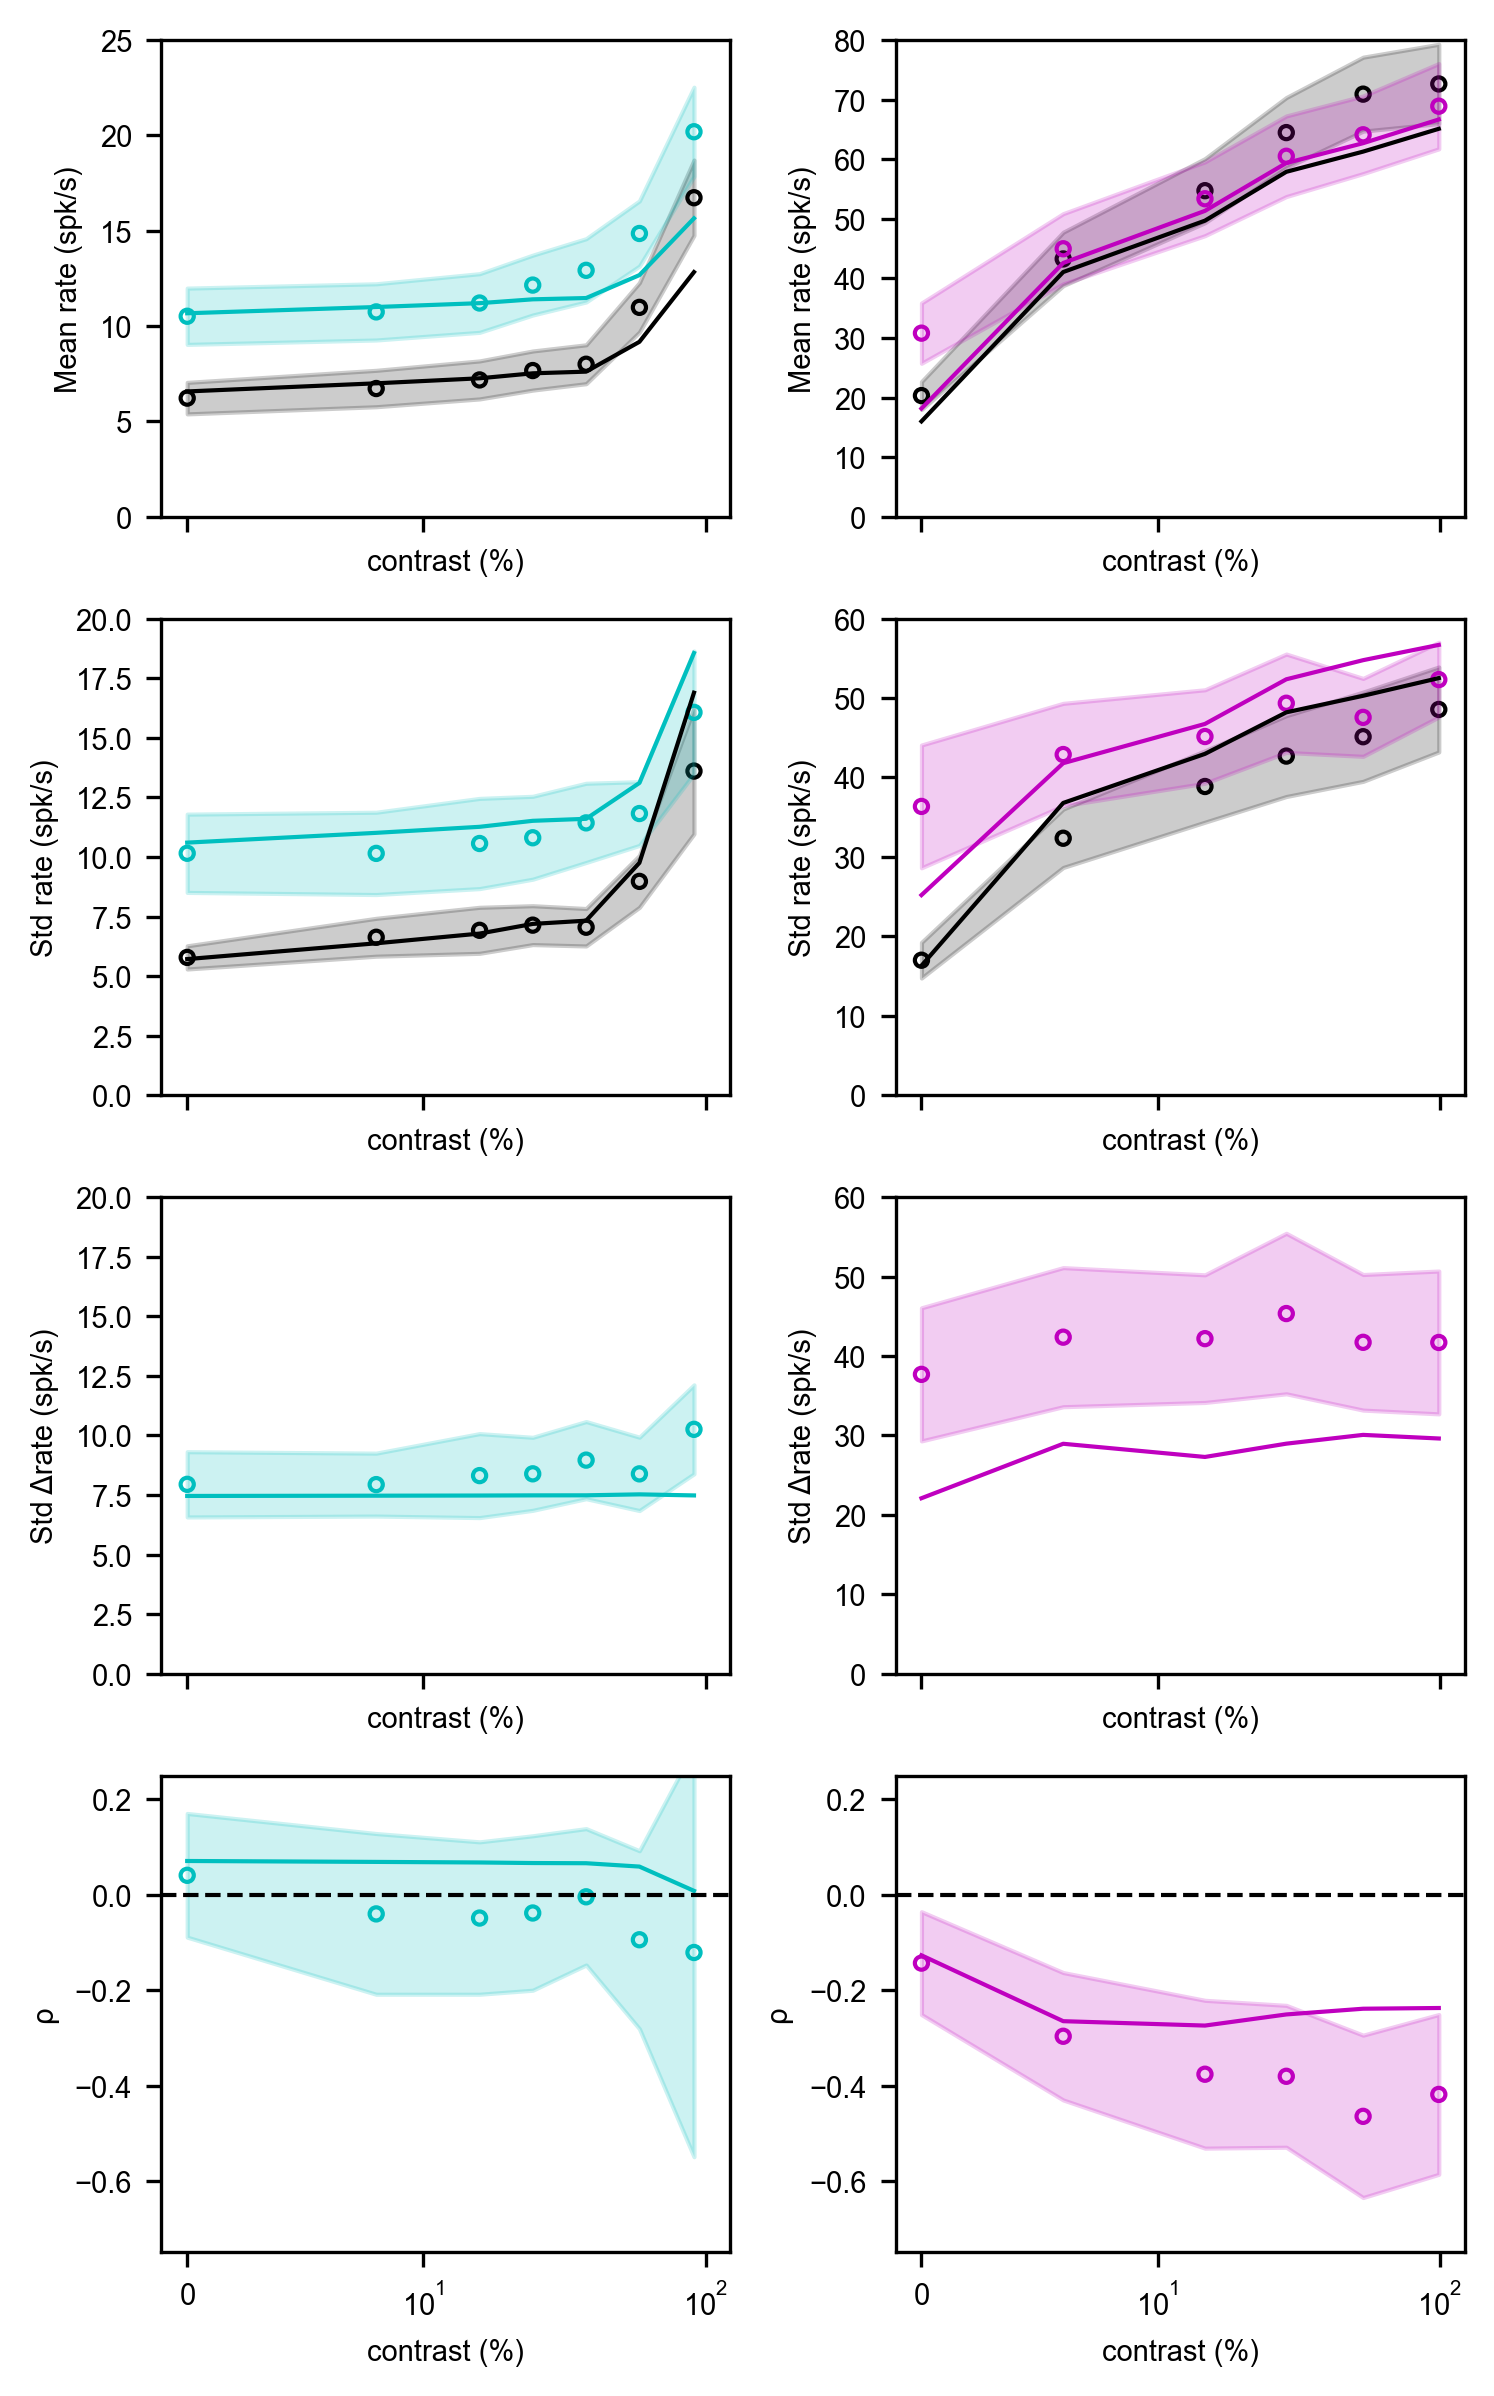

In [26]:
plot_preds([mous_preds.T,monk_preds.T],'./../plots','best_fits',animal='both',
    plot_delta_r=False)

# Simulate Ring with Monkey Fit, Plot with Balance

In [19]:
import torch

ri = ric.Ricciardi()
ri.set_up_nonlinearity('./../scripts/phi_int')
ri.set_up_nonlinearity_tensor()

NtE = 100
T = torch.linspace(0,NtE*ri.tE,round(NtE*ri.tE/(ri.tI/3))+1)
mask_time = T>(NtE/2*ri.tE)

Loading previously saved nonlinearity
Using cpu


In [20]:
reload(su)

net = ring_network.RingNetwork(seed=0,NC=[4,1],Nori=1200)

dynas = np.zeros((6,2,net.N,len(T)))

for i in range(6):
    net,_,dynas[i] = su.sim_ring_tensor(res_dict[monk_idx_min]['prms'],res_dict[monk_idx_min]['best_monk_eX'],
                                     res_dict[monk_idx_min]['best_monk_bX'],
                                     res_dict[monk_idx_min]['best_monk_aXs'][i],
                                     ri,T,mask_time,[0],True)

Doing seed 1 of 1
Using cpu
Generating disorder took  27.790622999999997  s

Integrating base network took  39.162549  s

Integrating opto network took  44.74493700000001  s

Doing seed 1 of 1
Using cpu
Generating disorder took  29.077803999999986  s

Integrating base network took  51.036486999999994  s

Integrating opto network took  80.66523599999996  s

Doing seed 1 of 1
Using cpu
Generating disorder took  29.569626000000028  s

Integrating base network took  52.563627  s

Integrating opto network took  89.53953999999999  s

Doing seed 1 of 1
Using cpu
Generating disorder took  29.58040900000003  s

Integrating base network took  53.204048  s

Integrating opto network took  56.74528800000007  s

Doing seed 1 of 1
Using cpu
Generating disorder took  30.633639000000016  s

Integrating base network took  61.40783899999997  s

Integrating opto network took  57.88185400000009  s

Doing seed 1 of 1
Using cpu
Generating disorder took  32.891254  s

Integrating base network took  60.3647550

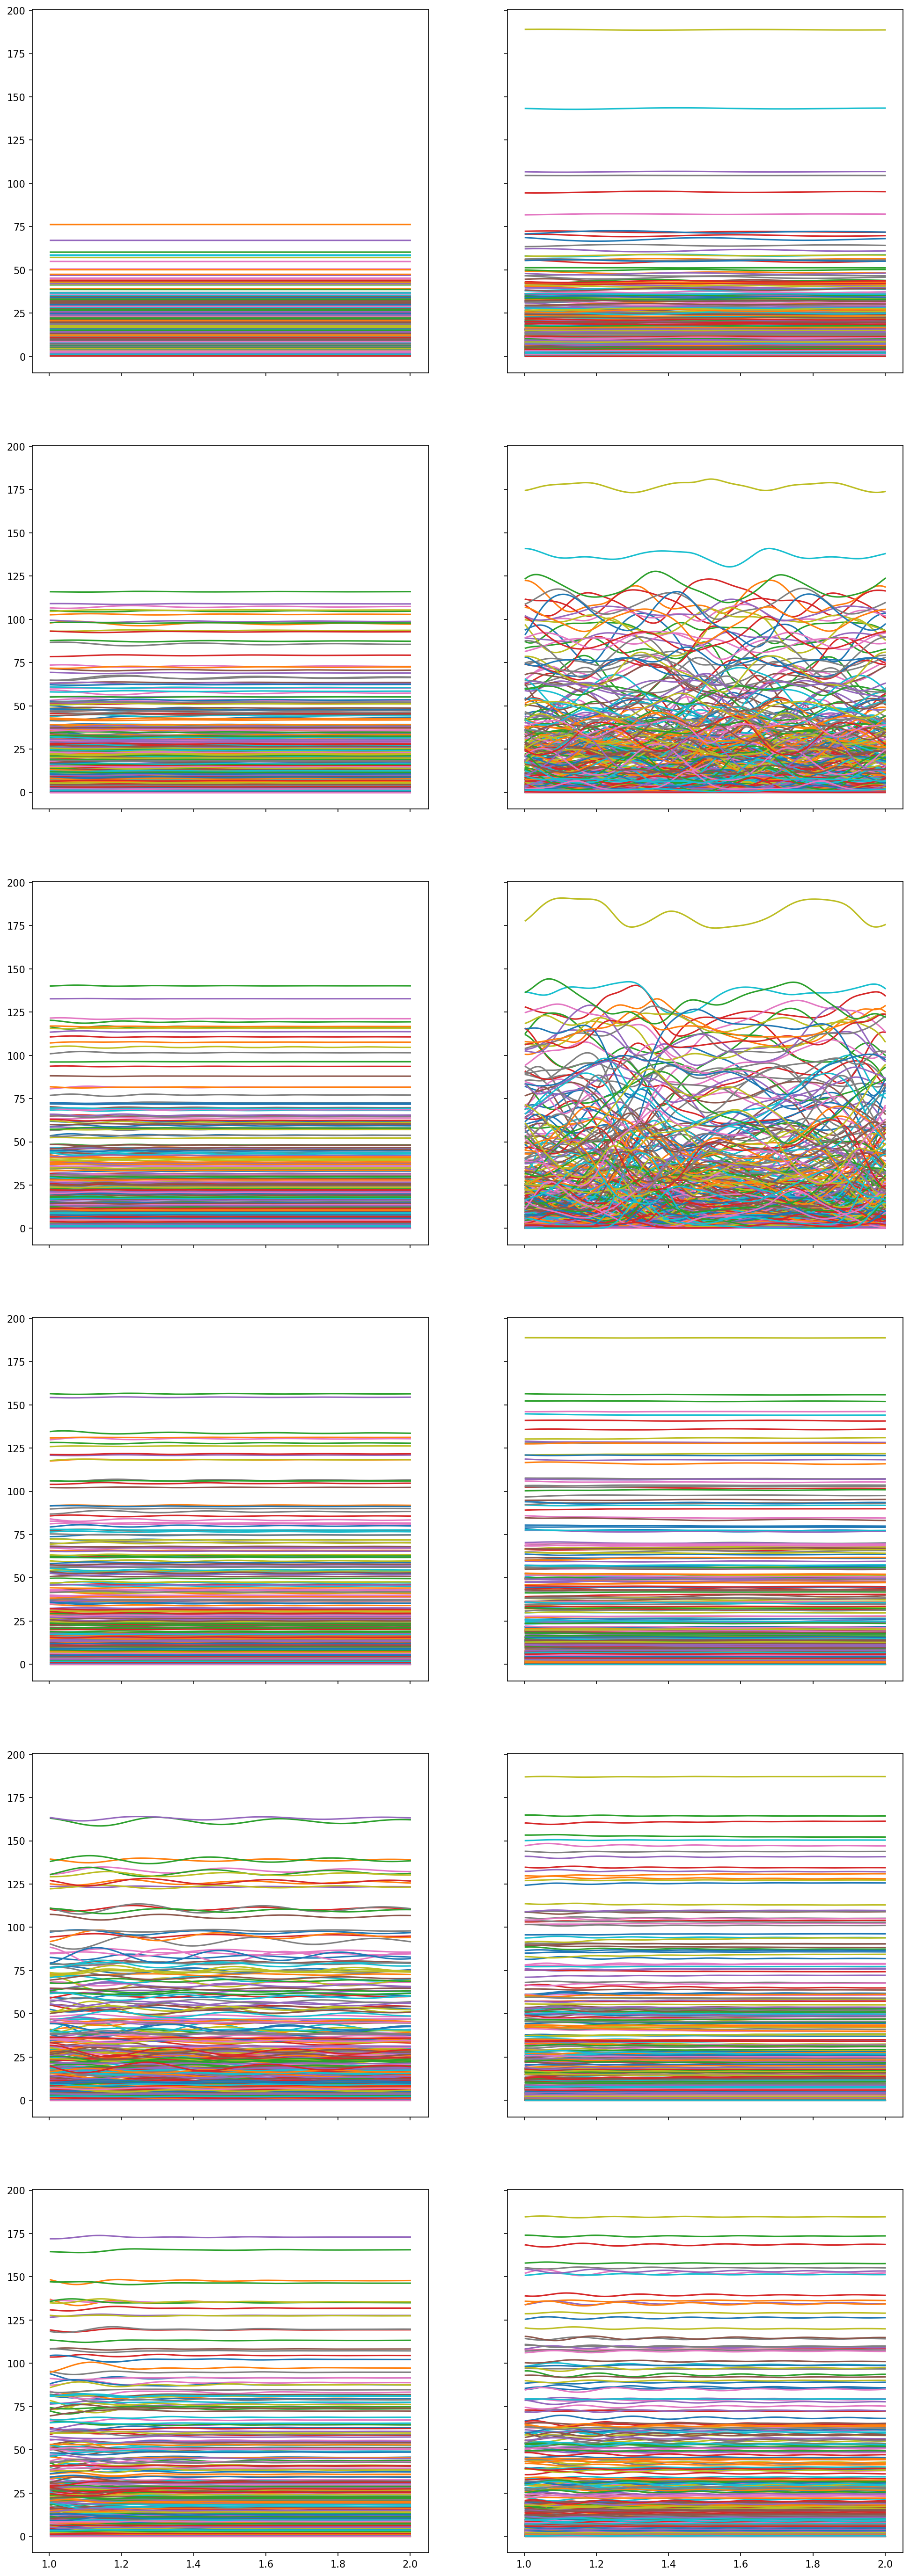

In [21]:
fig,axs = plt.subplots(6,2,figsize=(16,8*6),dpi=150,sharex=True,sharey=True)

for i in range(6):
    axs[i,0].plot(T[mask_time],dynas[i,0,::20,mask_time])
    axs[i,1].plot(T[mask_time],dynas[i,1,::20,mask_time])

plt.show()

In [23]:
reload(su)

vsm_idx = net.get_oriented_neurons()

try:
    bals = np.load('monk_bals.npy')
    optrs = np.load('monk_optrs.npy')
except:
    bals = np.zeros(6)
    optrs = np.zeros(6)

    for i in range(6):
        _,M,H,B,LAS,eps = su.gen_ring_disorder(0,res_dict[monk_idx_min]['prms'],
                                               res_dict[monk_idx_min]['best_monk_eX'])
        I = (res_dict[monk_idx_min]['best_monk_bX']*B + res_dict[monk_idx_min]['best_monk_aXs'][i]*H)*eps

        muE = M[:,net.C_all[0]]@dynas[i,0,net.C_all[0],-1] + I
        muE[net.C_all[0]] *= ri.tE
        muE[net.C_all[1]] *= ri.tI

        muI = M[:,net.C_all[1]]@dynas[i,0,net.C_all[1],-1]
        muI[net.C_all[0]] *= ri.tE
        muI[net.C_all[1]] *= ri.tI

        muL = LAS

        this_muE = muE[vsm_idx]
        this_muI = muI[vsm_idx]
        this_muL = muL[vsm_idx]

        bals[i] = np.mean(np.abs(this_muE+this_muI)/np.abs(this_muE))
        optrs[i] = np.mean(this_muL/this_muE)

    np.save('monk_bals',bals)
    np.save('monk_optrs',bals)

Done


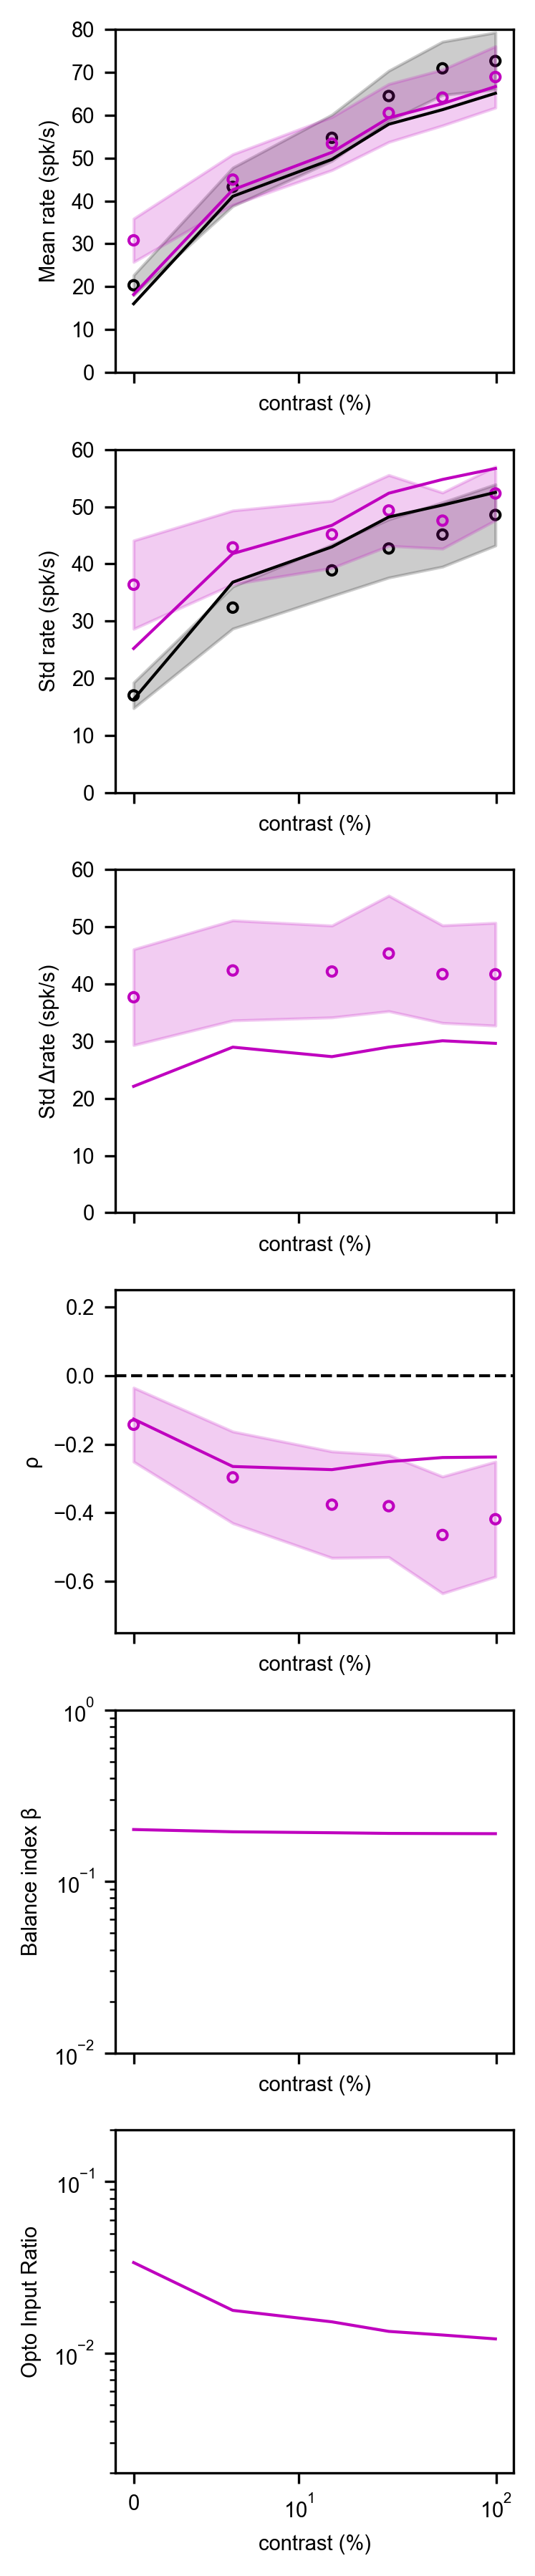

In [32]:
plot_preds_with_bal(monk_preds.T,bals,optrs,'./../plots','best_fits',animal='monkey',
    plot_delta_r=False)

# Plot Feature-Dependence of High Contrast

In [7]:
import torch

ri = ric.Ricciardi()
ri.set_up_nonlinearity('./../scripts/phi_int')
ri.set_up_nonlinearity_tensor()

NtE = 100
T = torch.linspace(0,NtE*ri.tE,round(NtE*ri.tE/(ri.tI/3))+1)
mask_time = T>(NtE/2*ri.tE)

Loading previously saved nonlinearity
Using cpu


In [10]:
reload(su)

net,_,dynas = su.sim_ring_tensor(res_dict[monk_idx_min]['prms'],res_dict[monk_idx_min]['best_monk_eX'],
                            res_dict[monk_idx_min]['best_monk_bX'],res_dict[monk_idx_min]['best_monk_aXs'][-1],
                            ri,T,mask_time,[0],True)

Doing seed 1 of 1
Using cpu
Generating disorder took  36.916566  s

Integrating base network took  66.204682  s

Integrating opto network took  71.459465  s



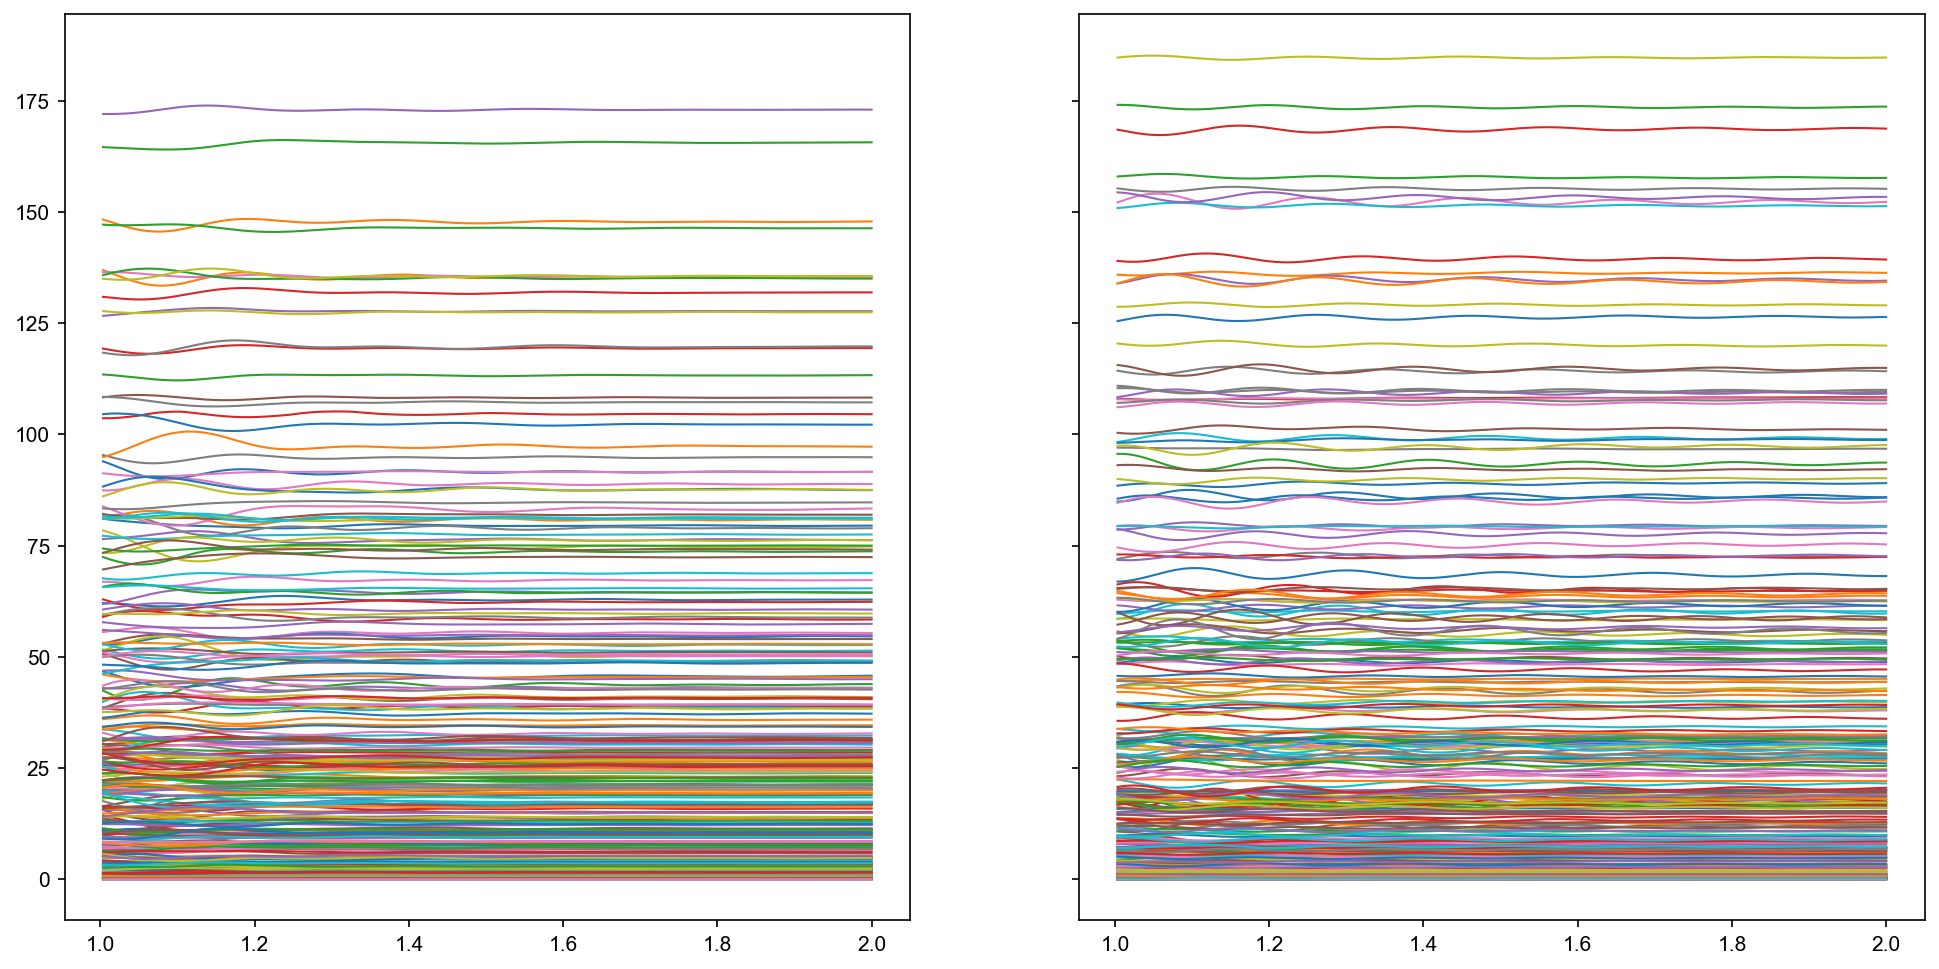

In [11]:
fig,axs = plt.subplots(1,2,figsize=(16,8),dpi=150,sharex=True,sharey=True)

axs[0].plot(T[mask_time],dynas[0,::20,mask_time])
axs[1].plot(T[mask_time],dynas[1,::20,mask_time])

plt.show()

In [8]:
reload(su)

seeds = np.arange(32)
try:
    rates = np.load('ring_rates.npy')
    net = ring_network.RingNetwork(seed=0,NC=[4,1],Nori=1200)
except:
    net,rates = su.sim_ring_tensor(res_dict[monk_idx_min]['prms'],res_dict[monk_idx_min]['best_monk_eX'],
                                res_dict[monk_idx_min]['best_monk_bX'],res_dict[monk_idx_min]['best_monk_aXs'][-1],
                                ri,T,mask_time,seeds,False)
    np.save('ring_rates',rates)

In [9]:
def bootstrap(stats):
    return [np.mean(stats),np.std(stats)]

def each_cov(A,B):
    N = A.shape[1]
    return np.array([np.cov(A[:,i],B[:,i])[0,1] for i in range(N)])

nob = 12#net.Nl//2
ori_bounds=np.linspace(0,90,nob+1)
ori_centers = 0.5*(ori_bounds[1:]+ori_bounds[:-1])
diff_width = (ori_bounds[1]-ori_bounds[0])/2

NEs=np.zeros((nob+1),dtype=np.int32)
NIs=np.zeros((nob+1),dtype=np.int32)

rbE_mean=np.zeros((nob+1,2))
rbI_mean=np.zeros((nob+1,2))
rbE_std=np.zeros((nob+1,2))
rbI_std=np.zeros((nob+1,2))

roE_mean=np.zeros((nob+1,2))
roI_mean=np.zeros((nob+1,2))
roE_std=np.zeros((nob+1,2))
roI_std=np.zeros((nob+1,2))

rdE_mean=np.zeros((nob+1,2))
rdI_mean=np.zeros((nob+1,2))
rdE_std=np.zeros((nob+1,2))
rdI_std=np.zeros((nob+1,2))

rdE_cov=np.zeros((nob+1,2))
rdI_cov=np.zeros((nob+1,2))
rdE_rho=np.zeros((nob+1,2))
rdI_rho=np.zeros((nob+1,2))

E_all = np.concatenate([net.C_all[0]+i*net.N for i in range(len(seeds))])
I_all = np.concatenate([net.C_all[1]+i*net.N for i in range(len(seeds))])

oris = base_network.make_periodic(np.concatenate([net.Z for i in range(len(seeds))]),90)
oriEs = base_network.make_periodic(oris[E_all],90)
oriIs = base_network.make_periodic(oris[I_all],90)
rbEs = rates[0,E_all]
rbIs = rates[0,I_all]
roEs = rates[1,E_all]
roIs = rates[1,I_all]
rdEs = roEs - rbEs
rdIs = roIs - rbIs

for l in range(nob+1):
    this_Es = np.logical_and(oriEs >= ori_bounds[l]-diff_width,
                             oriEs <  ori_bounds[l]+diff_width)
    this_Is = np.logical_and(oriIs >= ori_bounds[l]-diff_width,
                             oriIs <  ori_bounds[l]+diff_width)
    
    NEs[l] = np.count_nonzero(this_Es)
    NIs[l] = np.count_nonzero(this_Is)
    
    Nstat = int(1e3)
    bootstrap_Es = np.random.choice(np.asarray(this_Es).nonzero()[0], size=(NEs[l],Nstat), replace=True)
    bootstrap_Is = np.random.choice(np.asarray(this_Is).nonzero()[0], size=(NIs[l],Nstat), replace=True)
    
    this_rbEs = rbEs[bootstrap_Es]
    this_rbIs = rbIs[bootstrap_Is]
    this_roEs = roEs[bootstrap_Es]
    this_roIs = roIs[bootstrap_Is]
    this_rdEs = this_roEs - this_rbEs
    this_rdIs = this_roIs - this_rbIs
    
    rbE_mean[l]=bootstrap(np.mean(this_rbEs,axis=0))
    rbI_mean[l]=bootstrap(np.mean(this_rbIs,axis=0))
    rbE_std[l]=bootstrap(np.std(this_rbEs,axis=0))
    rbI_std[l]=bootstrap(np.std(this_rbIs,axis=0))
    
    roE_mean[l]=bootstrap(np.mean(this_roEs,axis=0))
    roI_mean[l]=bootstrap(np.mean(this_roIs,axis=0))
    roE_std[l]=bootstrap(np.std(this_roEs,axis=0))
    roI_std[l]=bootstrap(np.std(this_roIs,axis=0))
    
    rdE_mean[l]=bootstrap(np.mean(this_rdEs,axis=0))
    rdI_mean[l]=bootstrap(np.mean(this_rdIs,axis=0))
    rdE_std[l]=bootstrap(np.std(this_rdEs,axis=0))
    rdI_std[l]=bootstrap(np.std(this_rdIs,axis=0))
    
    bootstrap_cov_Es = each_cov(this_rbEs,this_rdEs)
    bootstrap_cov_Is = each_cov(this_rbIs,this_rdIs)
    
    rdE_cov[l]=bootstrap(bootstrap_cov_Es)
    rdI_cov[l]=bootstrap(bootstrap_cov_Is)
    rdE_rho[l]=bootstrap(bootstrap_cov_Es/np.var(this_rdEs,axis=0))
    rdI_rho[l]=bootstrap(bootstrap_cov_Is/np.var(this_rdIs,axis=0))

In [10]:
from scipy.optimize import curve_fit

def get_gauss_fits(θ,r,guess=True):
    def halfgauss(x,A,S,B):
        return B+A*np.exp(-0.5*x**2/S**2)
        
    def HWHM(X,Y):
        if np.mean(Y) < 0:
            half_max = 0.5 * np.min(Y)
        else:
            half_max = 0.5 * np.max(Y)
        d = np.abs(Y-half_max)
        return X[np.argmin(d)]
    
    if guess:
        try:
            popt, pcov = curve_fit(halfgauss, θ, r, p0=(r[0]-np.mean(r[-5:]),
                                                        HWHM(θ,r-np.mean(r[-5:]))/np.sqrt(2*np.log(2)),
                                                        np.mean(r[-5:])))
        except:
            popt, pcov = curve_fit(halfgauss, θ, r, p0=(r[0]-np.mean(r[-5:]),10,np.mean(r[-5:])))
    else:
        popt, pcov = curve_fit(halfgauss, θ, r)
    popt[1] = np.abs(popt[1])
    
    return popt,np.sqrt(np.diag(pcov))

def plot_data_err_band(ax,θ,rmean,rerr,c='k',ls='-',**kwargs):
    ax.plot(θ,rmean,c=c,ls=ls,alpha=0.5,**kwargs)
    ax.fill_between(θ,rmean+rerr,rmean-rerr,color=c,alpha=0.2,**kwargs)

def plot_data_err_bar(ax,θ,rmean,rerr,alpha=1,**kwargs):
    ax.errorbar(θ,rmean,yerr=rerr,alpha=alpha,**kwargs)

def plot_data_fit_pts(ax,θ,r,label,c='k',ls='-',printfit=False):
    def halfgauss(x,A,S,B):
        return B+A*np.exp(-0.5*x**2/S**2)
    
    popt,perr = get_gauss_fits(θ,r,guess=False)
    
    if printfit:
        print(label,'Amp =',popt[0],'±',perr[0])
        print(label,'Wid =',popt[1],'±',perr[1])
        print(label,'Bas =',popt[2],'±',perr[2])
        print()

    quants = 30
    bin_idxs = pd.qcut(θ,quants,labels=False)
    bins = np.array([np.mean(θ[bin_idxs == i]) for i in range(quants)])
    mean = np.array([np.mean(r[bin_idxs == i]) for i in range(quants)])
    err = np.array([np.std(r[bin_idxs == i]/np.sqrt(len(r)/quants)) for i in range(quants)])

    θs = np.linspace(0,90,181)

    ax.plot(θs,halfgauss(θs,*popt),c=c,ls=ls)
    ax.plot(bins,mean,c=c,ls=ls,alpha=0.5)
    ax.fill_between(bins,mean+err,mean-err,color=c,alpha=0.2)

def plot_data_fit_line(ax,θ,r,label,c='k',ls='-',printfit=False):
    def halfgauss(x,A,S,B):
        return B+A*np.exp(-0.5*x**2/S**2)
    
    popt,perr = get_gauss_fits(θ,r,guess=True)
    
    if printfit:
        print(label,'Amp =',popt[0],'±',perr[0])
        print(label,'Wid =',popt[1],'±',perr[1])
        print(label,'Bas =',popt[2],'±',perr[2])
        print()

    θs = np.linspace(0,90,181)

    ax.plot(θs,halfgauss(θs,*popt),c=c,ls=ls)
    ax.plot(θ,r,c=c,ls=ls,alpha=0.5)

Text(0.5, 0.98, 'Equivalent Disordered Ring Model')

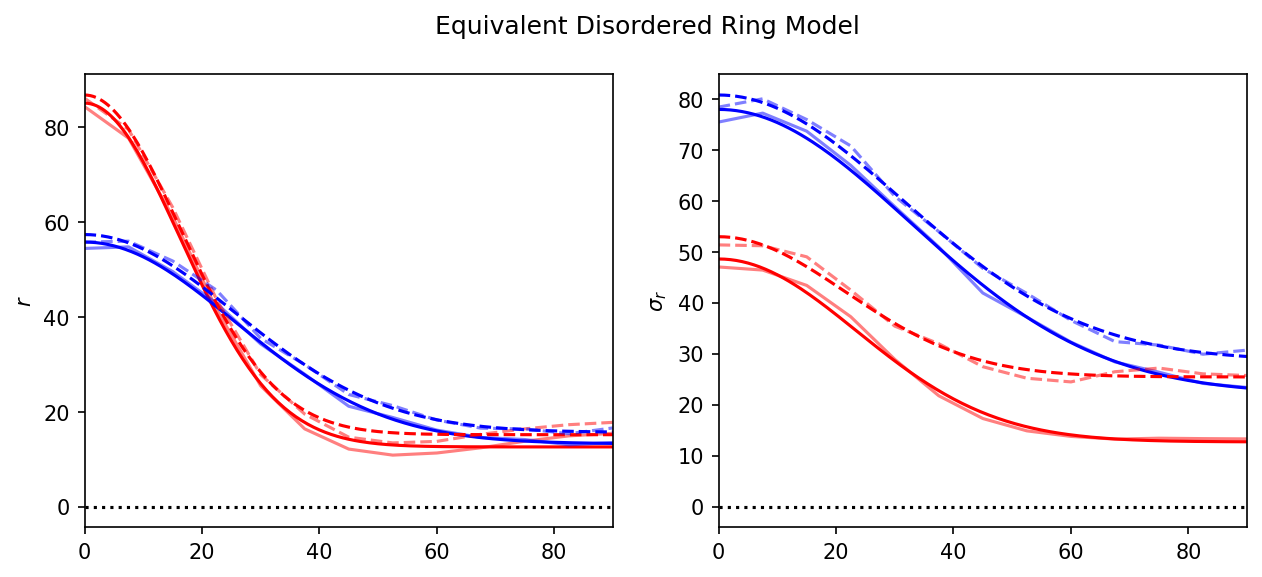

In [58]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150,sharex='all')
# fig.subplots_adjust(hspace = .4, wspace=.5)
axs[0].set_xlim(0,90)

plot_data_fit_line(axs[0],ori_bounds,rbE_mean[:,0],'r_{b,E}','r','-')
plot_data_fit_line(axs[0],ori_bounds,rbI_mean[:,0],'r_{b,I}','b','-')
plot_data_fit_line(axs[0],ori_bounds,roE_mean[:,0],'r_{o,E}','r','--')
plot_data_fit_line(axs[0],ori_bounds,roI_mean[:,0],'r_{o,I}','b','--')
axs[0].axhline(0,c='k',ls=':')
axs[0].set_ylabel(r'$r$')

plot_data_fit_line(axs[1],ori_bounds,rbE_std[:,0],'σr_{b,E}','r','-')
plot_data_fit_line(axs[1],ori_bounds,rbI_std[:,0],'σr_{b,I}','b','-')
plot_data_fit_line(axs[1],ori_bounds,roE_std[:,0],'σr_{o,E}','r','--')
plot_data_fit_line(axs[1],ori_bounds,roI_std[:,0],'σr_{o,I}','b','--')
axs[1].axhline(0,c='k',ls=':')
axs[1].set_ylabel(r'$\sigma_r$')

fig.suptitle('Equivalent Disordered Ring Model')

# Compare Simulations with DMFT Results

In [11]:
def halfgauss(x,A,S,B):
    return B+A*np.exp(-0.5*x**2/S**2)
θs = np.linspace(-1,91,181)

srb = np.array([16.641127, 25.300146])
rbb = np.array([15.133091, 15.398537])
rbp = np.array([78.027090, 55.947884])

sro = np.array([16.728190, 25.216362])
rob = np.array([17.173674, 17.412464])
rop = np.array([79.619800, 57.536846])

sCrb = np.array([14.73328116, 23.70740932])
Crbb = np.array([ 395.23740578,  837.91704739])
Crbp = np.array([8604.41703812, 9121.81192323])

sCro = np.array([14.85203267, 23.81634354])
Crob = np.array([ 782.81015023, 1124.22663635])
Crop = np.array([9177.88571553, 9616.18620307])

rbEs = halfgauss(θs,rbp[0]-rbb[0],srb[0],rbb[0])
rbIs = halfgauss(θs,rbp[1]-rbb[1],srb[1],rbb[1])
roEs = halfgauss(θs,rop[0]-rob[0],sro[0],rob[0])
roIs = halfgauss(θs,rop[1]-rob[1],sro[1],rob[1])

CrbEs = halfgauss(θs,Crbp[0]-Crbb[0],sCrb[0],Crbb[0])
CrbIs = halfgauss(θs,Crbp[1]-Crbb[1],sCrb[1],Crbb[1])
CroEs = halfgauss(θs,Crop[0]-Crob[0],sCro[0],Crob[0])
CroIs = halfgauss(θs,Crop[1]-Crob[1],sCro[1],Crob[1])

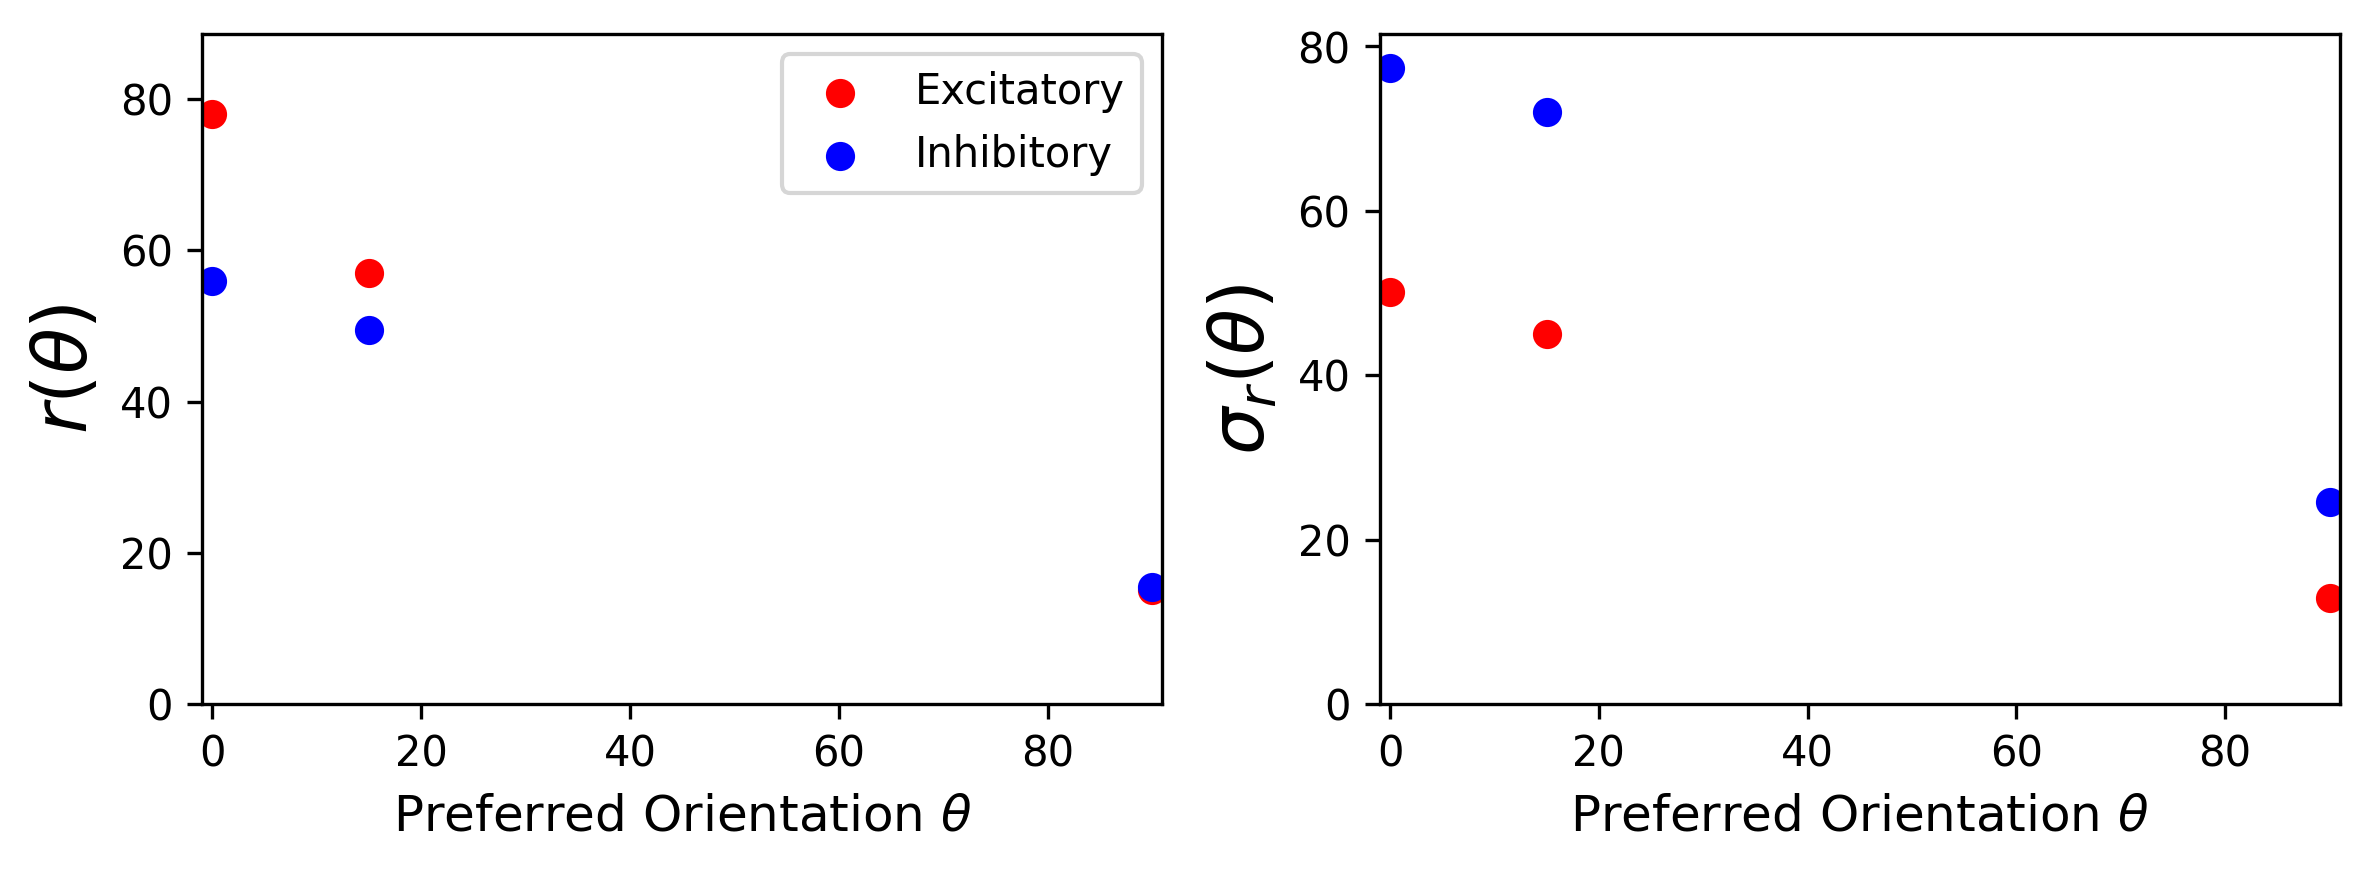

In [19]:
fig,axs = plt.subplots(1,2,figsize=(8,3),dpi=300,sharex=False,sharey=False)
axs[0].set_xlim(-1,91)
axs[1].set_xlim(-1,91)

θdots = np.array([0,15,90])

rbEdots = halfgauss(θdots,rbp[0]-rbb[0],srb[0],rbb[0])
rbIdots = halfgauss(θdots,rbp[1]-rbb[1],srb[1],rbb[1])
roEdots = halfgauss(θdots,rop[0]-rob[0],sro[0],rob[0])
roIdots = halfgauss(θdots,rop[1]-rob[1],sro[1],rob[1])

CrbEdots = halfgauss(θdots,Crbp[0]-Crbb[0],sCrb[0],Crbb[0])
CrbIdots = halfgauss(θdots,Crbp[1]-Crbb[1],sCrb[1],Crbb[1])
CroEdots = halfgauss(θdots,Crop[0]-Crob[0],sCro[0],Crob[0])
CroIdots = halfgauss(θdots,Crop[1]-Crob[1],sCro[1],Crob[1])

axs[0].scatter(θdots,rbEdots,c='r',label=r'Excitatory')
axs[0].scatter(θdots,rbIdots,c='b',label=r'Inhibitory')

axs[1].scatter(θdots,np.sqrt(np.maximum(0,CrbEdots-rbEdots**2)),c='r')
axs[1].scatter(θdots,np.sqrt(np.maximum(0,CrbIdots-rbIdots**2)),c='b')

# axs[0].plot(θs,rbEs,c='r',ls='-')
# axs[0].plot(θs,rbIs,c='b',ls='-')

# axs[1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
# axs[1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

plot_data_err_bar(axs[1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

axs[0].set_ylim(0,None)
axs[1].set_ylim(0,None)

axs[0].set_ylabel(r'$r(\theta)$',fontsize=18)
axs[1].set_ylabel(r'$\sigma_{r}(\theta)$',fontsize=18)

axs[0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

axs[0].legend()

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

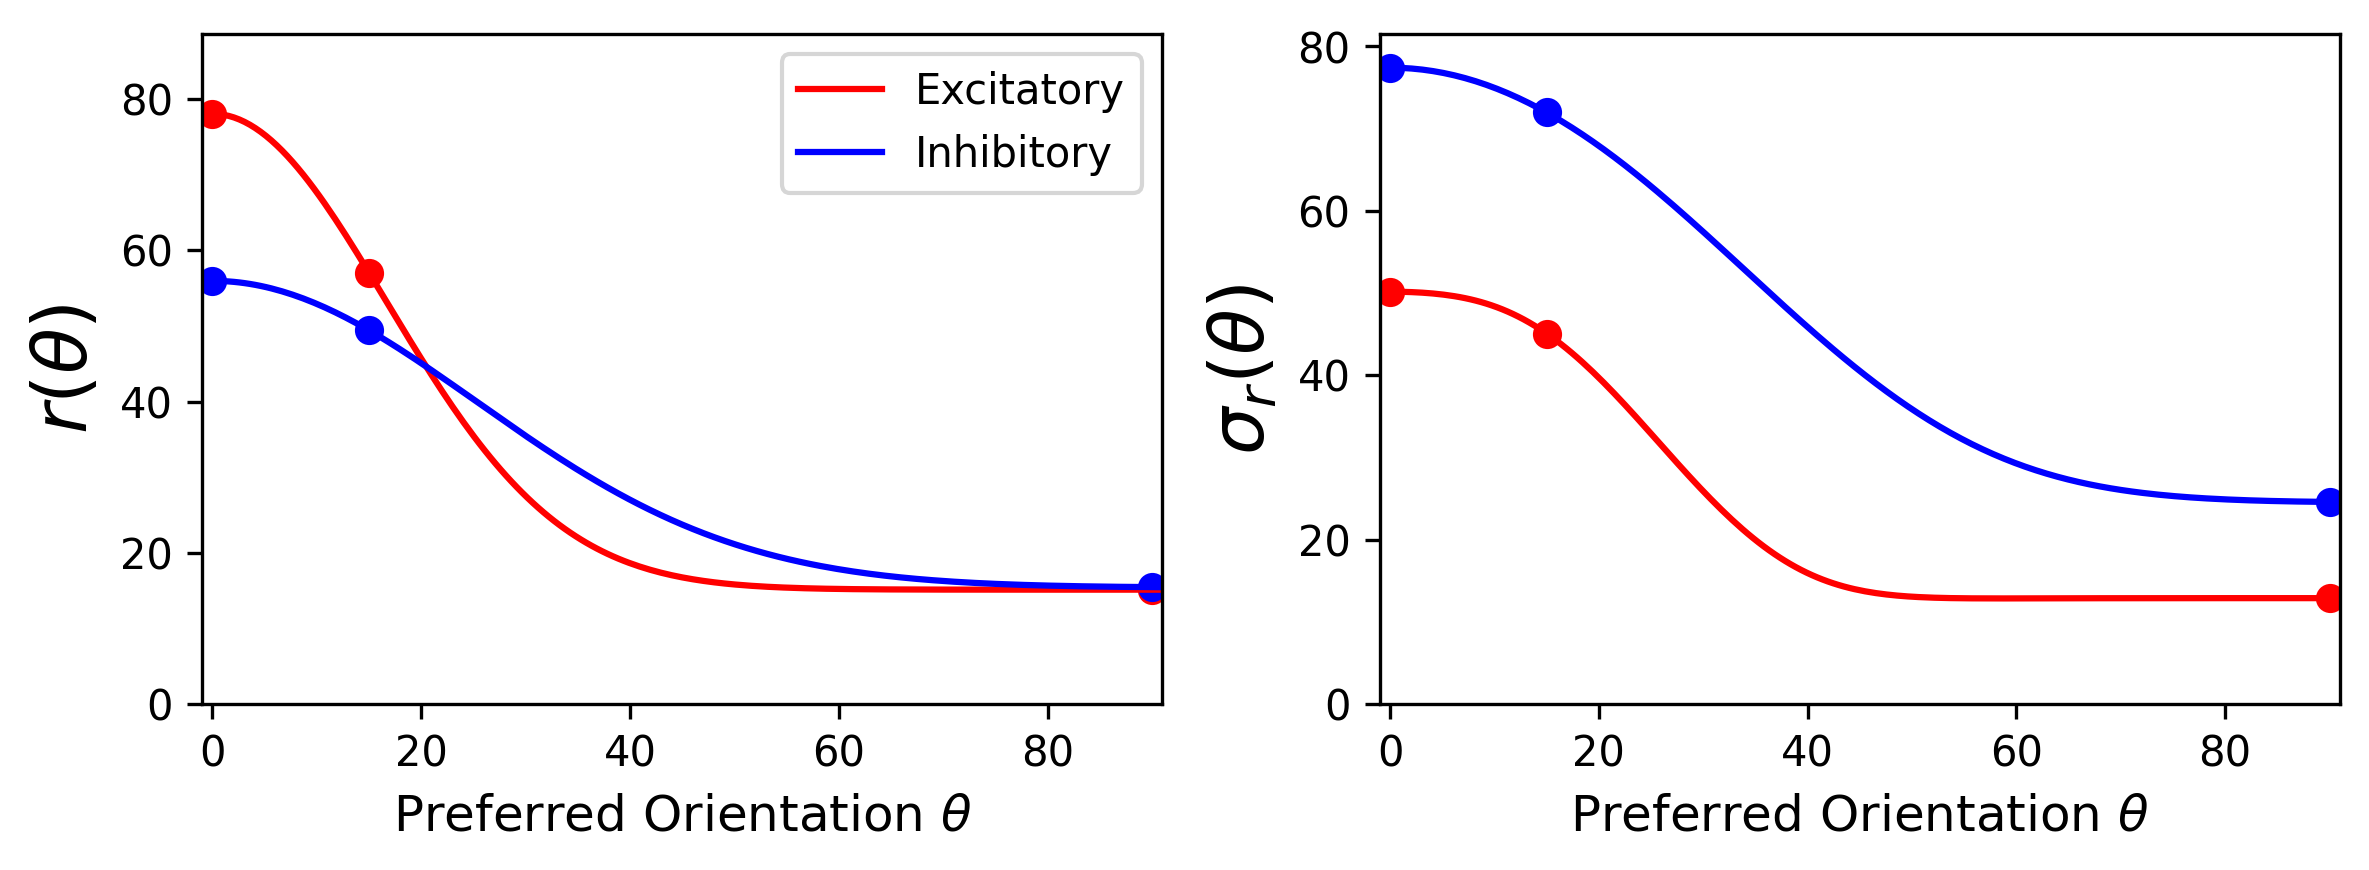

In [21]:
fig,axs = plt.subplots(1,2,figsize=(8,3),dpi=300,sharex=False,sharey=False)
axs[0].set_xlim(-1,91)
axs[1].set_xlim(-1,91)

θdots = np.array([0,15,90])

rbEdots = halfgauss(θdots,rbp[0]-rbb[0],srb[0],rbb[0])
rbIdots = halfgauss(θdots,rbp[1]-rbb[1],srb[1],rbb[1])
roEdots = halfgauss(θdots,rop[0]-rob[0],sro[0],rob[0])
roIdots = halfgauss(θdots,rop[1]-rob[1],sro[1],rob[1])

CrbEdots = halfgauss(θdots,Crbp[0]-Crbb[0],sCrb[0],Crbb[0])
CrbIdots = halfgauss(θdots,Crbp[1]-Crbb[1],sCrb[1],Crbb[1])
CroEdots = halfgauss(θdots,Crop[0]-Crob[0],sCro[0],Crob[0])
CroIdots = halfgauss(θdots,Crop[1]-Crob[1],sCro[1],Crob[1])

axs[0].scatter(θdots,rbEdots,c='r')
axs[0].scatter(θdots,rbIdots,c='b')

axs[1].scatter(θdots,np.sqrt(np.maximum(0,CrbEdots-rbEdots**2)),c='r')
axs[1].scatter(θdots,np.sqrt(np.maximum(0,CrbIdots-rbIdots**2)),c='b')

axs[0].plot(θs,rbEs,c='r',ls='-',label=r'Excitatory')
axs[0].plot(θs,rbIs,c='b',ls='-',label=r'Inhibitory')

axs[1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

plot_data_err_bar(axs[1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

axs[0].set_ylim(0,None)
axs[1].set_ylim(0,None)

axs[0].set_ylabel(r'$r(\theta)$',fontsize=18)
axs[1].set_ylabel(r'$\sigma_{r}(\theta)$',fontsize=18)

axs[0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

axs[0].legend()

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

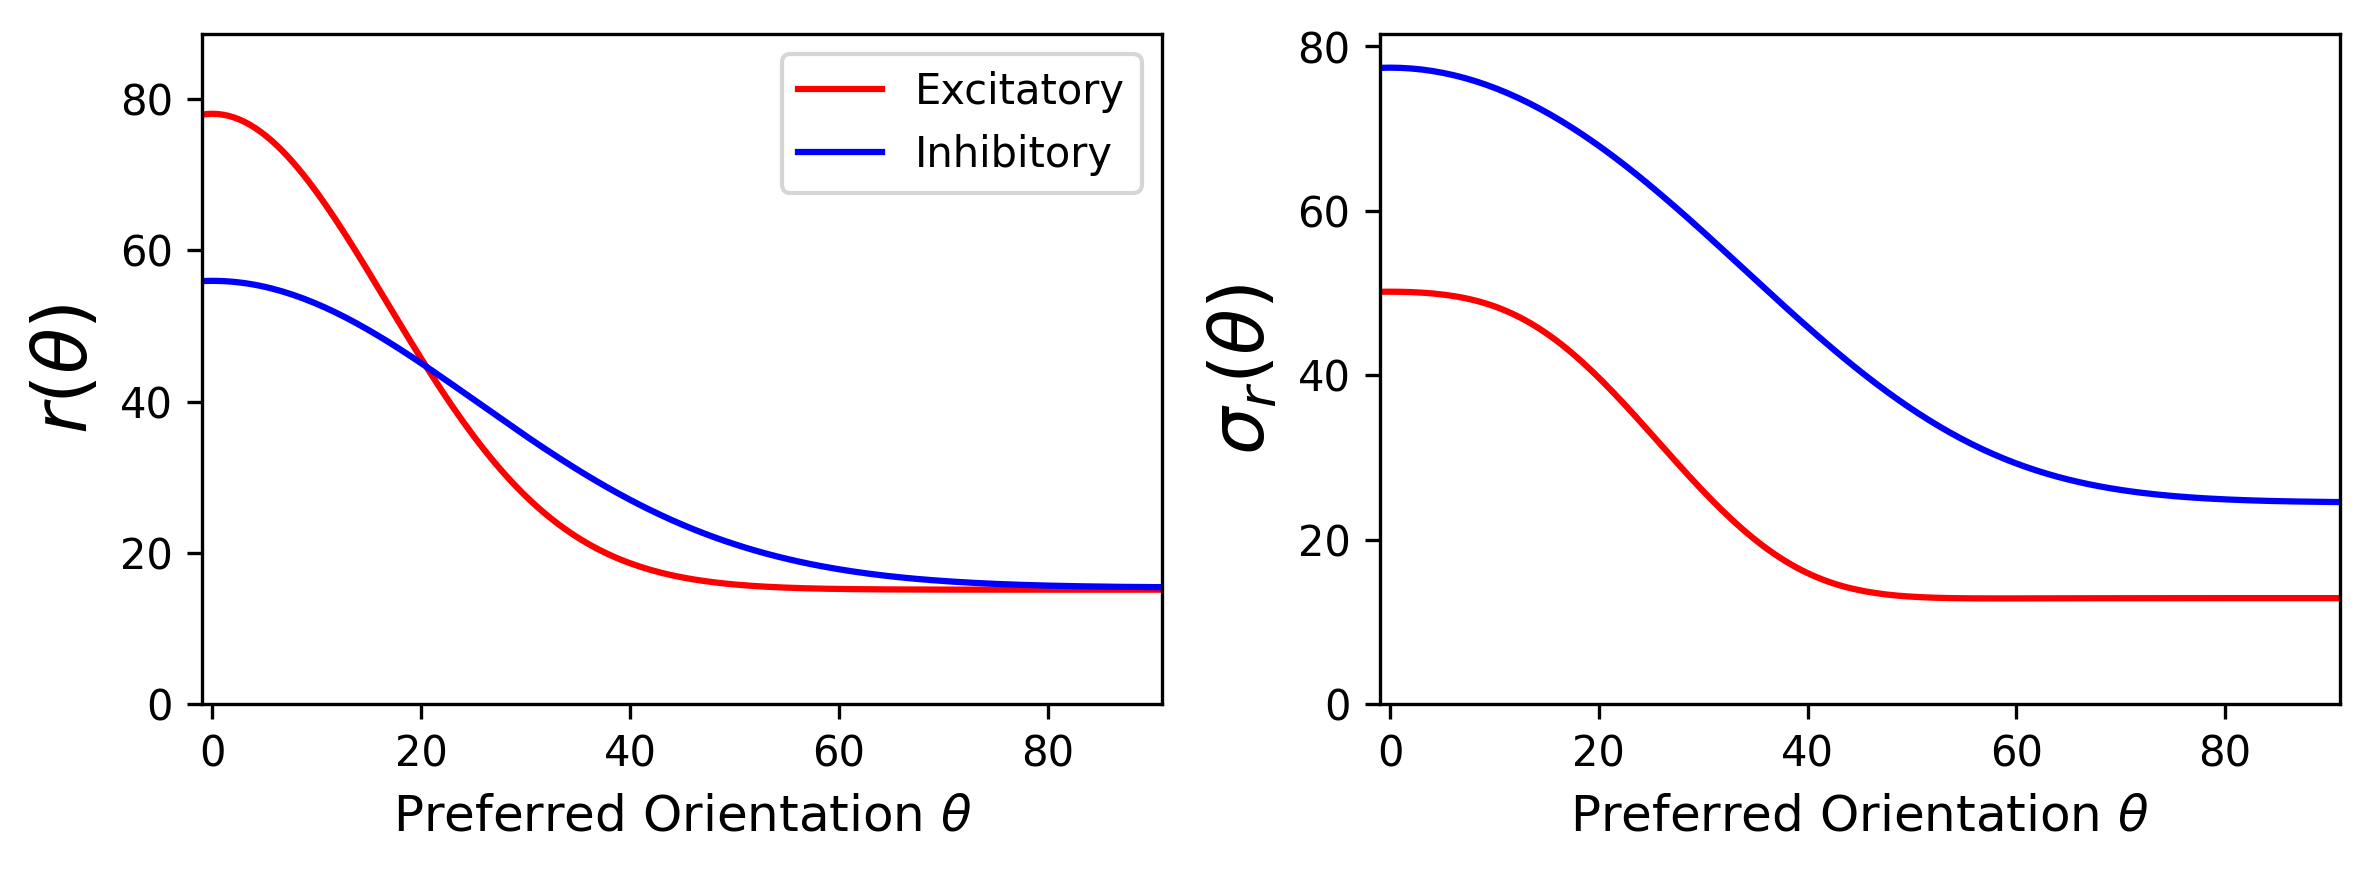

In [22]:
fig,axs = plt.subplots(1,2,figsize=(8,3),dpi=300,sharex=False,sharey=False)
axs[0].set_xlim(-1,91)
axs[1].set_xlim(-1,91)

axs[0].plot(θs,rbEs,c='r',ls='-',label=r'Excitatory')
axs[0].plot(θs,rbIs,c='b',ls='-',label=r'Inhibitory')

axs[1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

plot_data_err_bar(axs[1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

axs[0].set_ylim(0,None)
axs[1].set_ylim(0,None)

axs[0].set_ylabel(r'$r(\theta)$',fontsize=18)
axs[1].set_ylabel(r'$\sigma_{r}(\theta)$',fontsize=18)

axs[0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

axs[0].legend()

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

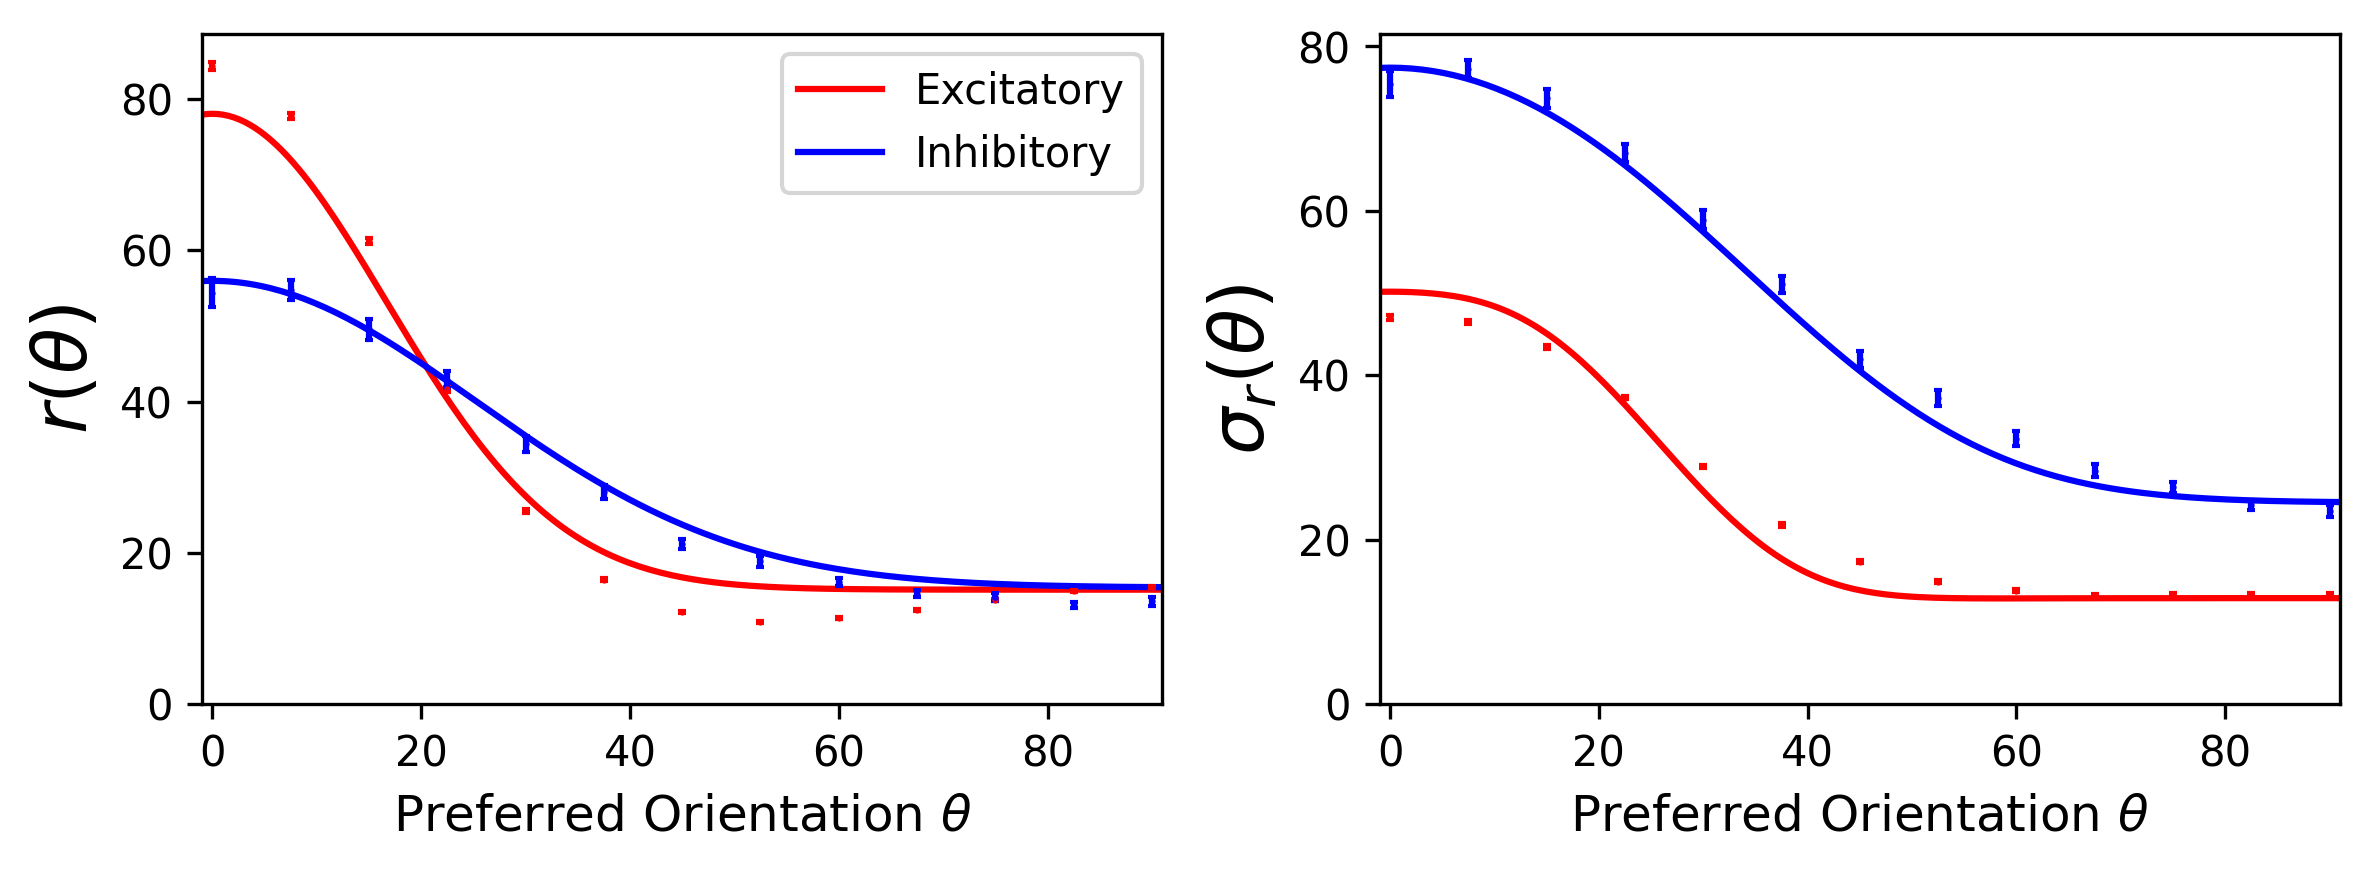

In [23]:
fig,axs = plt.subplots(1,2,figsize=(8,3),dpi=300,sharex=False,sharey=False)
axs[0].set_xlim(-1,91)
axs[1].set_xlim(-1,91)

axs[0].plot(θs,rbEs,c='r',ls='-',label=r'Excitatory')
axs[0].plot(θs,rbIs,c='b',ls='-',label=r'Inhibitory')

axs[1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=1)
plot_data_err_bar(axs[0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=1)

plot_data_err_bar(axs[1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=1)
plot_data_err_bar(axs[1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=1)

axs[0].set_ylim(0,None)
axs[1].set_ylim(0,None)

axs[0].set_ylabel(r'$r(\theta)$',fontsize=18)
axs[1].set_ylabel(r'$\sigma_{r}(\theta)$',fontsize=18)

axs[0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

axs[0].legend()

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

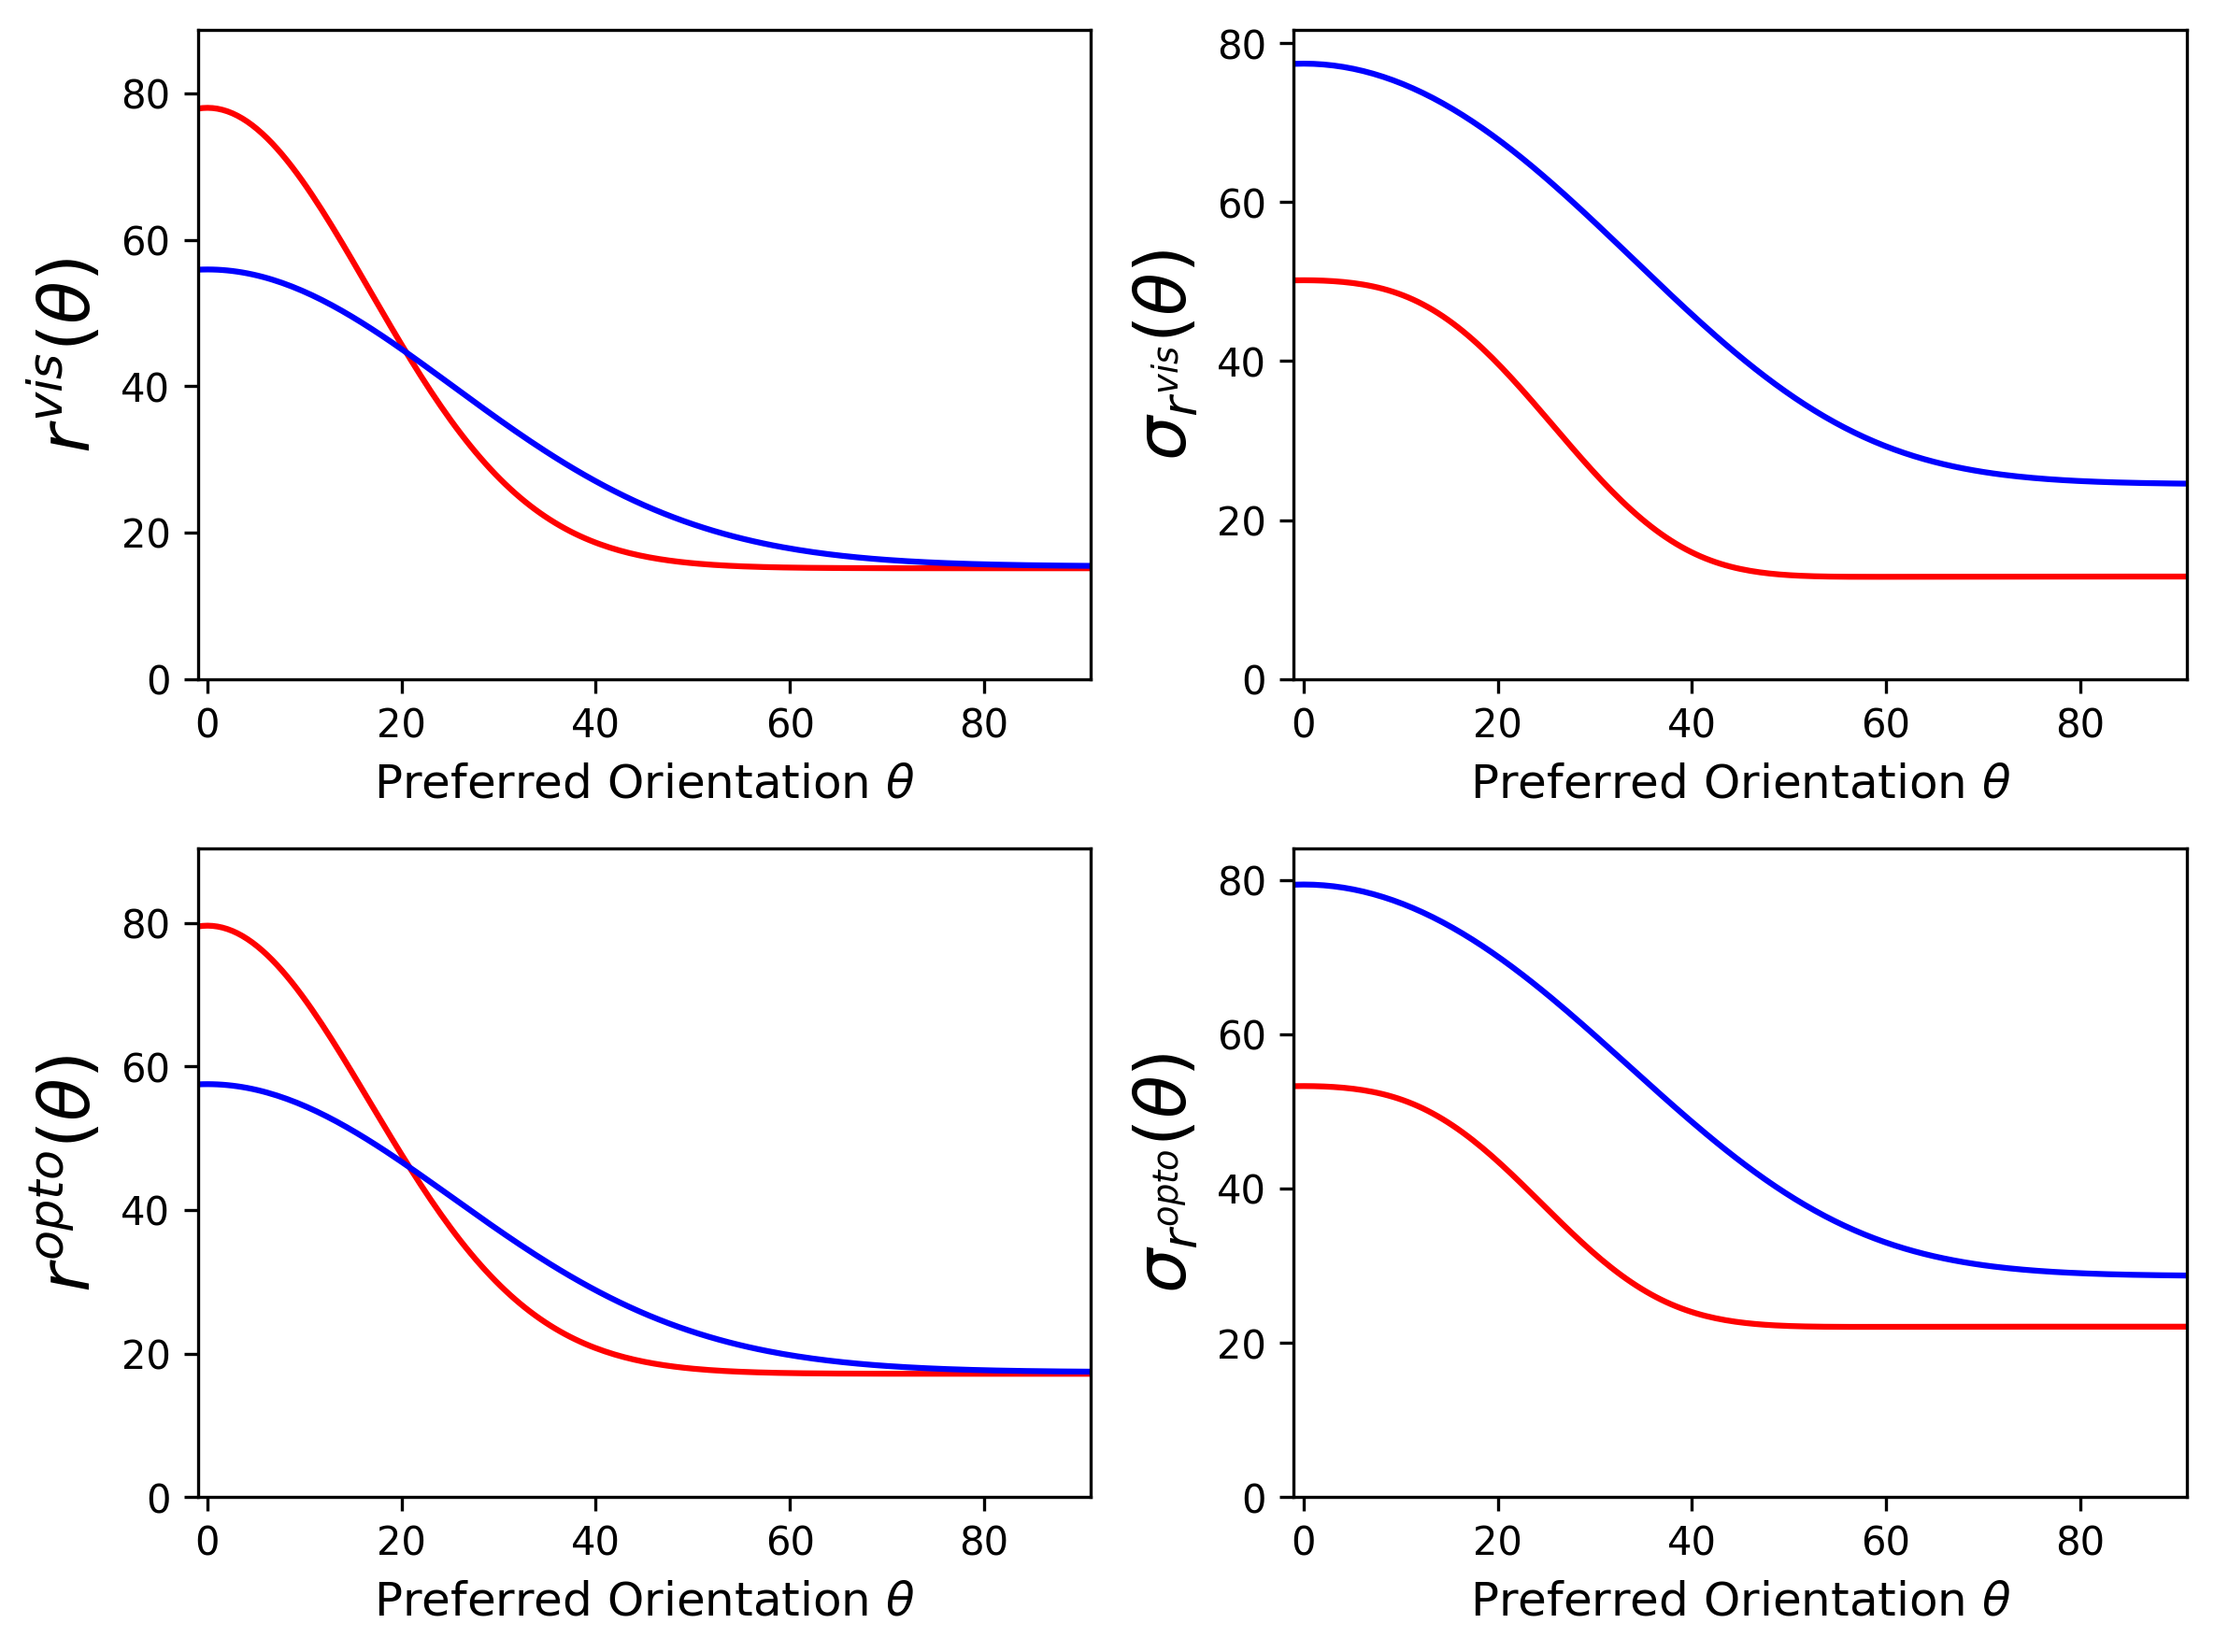

In [171]:
fig,axs = plt.subplots(2,2,figsize=(8,6),dpi=300,sharex=False,sharey=False)
axs[0,0].set_xlim(-1,91)
axs[0,1].set_xlim(-1,91)
axs[1,0].set_xlim(-1,91)
axs[1,1].set_xlim(-1,91)

axs[0,0].plot(θs,rbEs,c='r',ls='-')
axs[0,0].plot(θs,rbIs,c='b',ls='-')
axs[1,0].plot(θs,roEs,c='r',ls='-')
axs[1,0].plot(θs,roIs,c='b',ls='-')

axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroEs-roEs**2)),c='r',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroIs-roIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[0,0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1,0],ori_bounds,roE_mean[:,0],roE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1,0],ori_bounds,roI_mean[:,0],roI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

plot_data_err_bar(axs[0,1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1,1],ori_bounds,roE_std[:,0],roE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1,alpha=0)
plot_data_err_bar(axs[1,1],ori_bounds,roI_std[:,0],roI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1,alpha=0)

axs[0,0].set_ylim(0,None)
axs[0,1].set_ylim(0,None)
axs[1,0].set_ylim(0,None)
axs[1,1].set_ylim(0,None)

axs[0,0].set_ylabel(r'$r^{vis}(\theta)$',fontsize=18)
axs[1,0].set_ylabel(r'$r^{opto}(\theta)$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{r^{vis}}(\theta)$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{r^{opto}}(\theta)$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

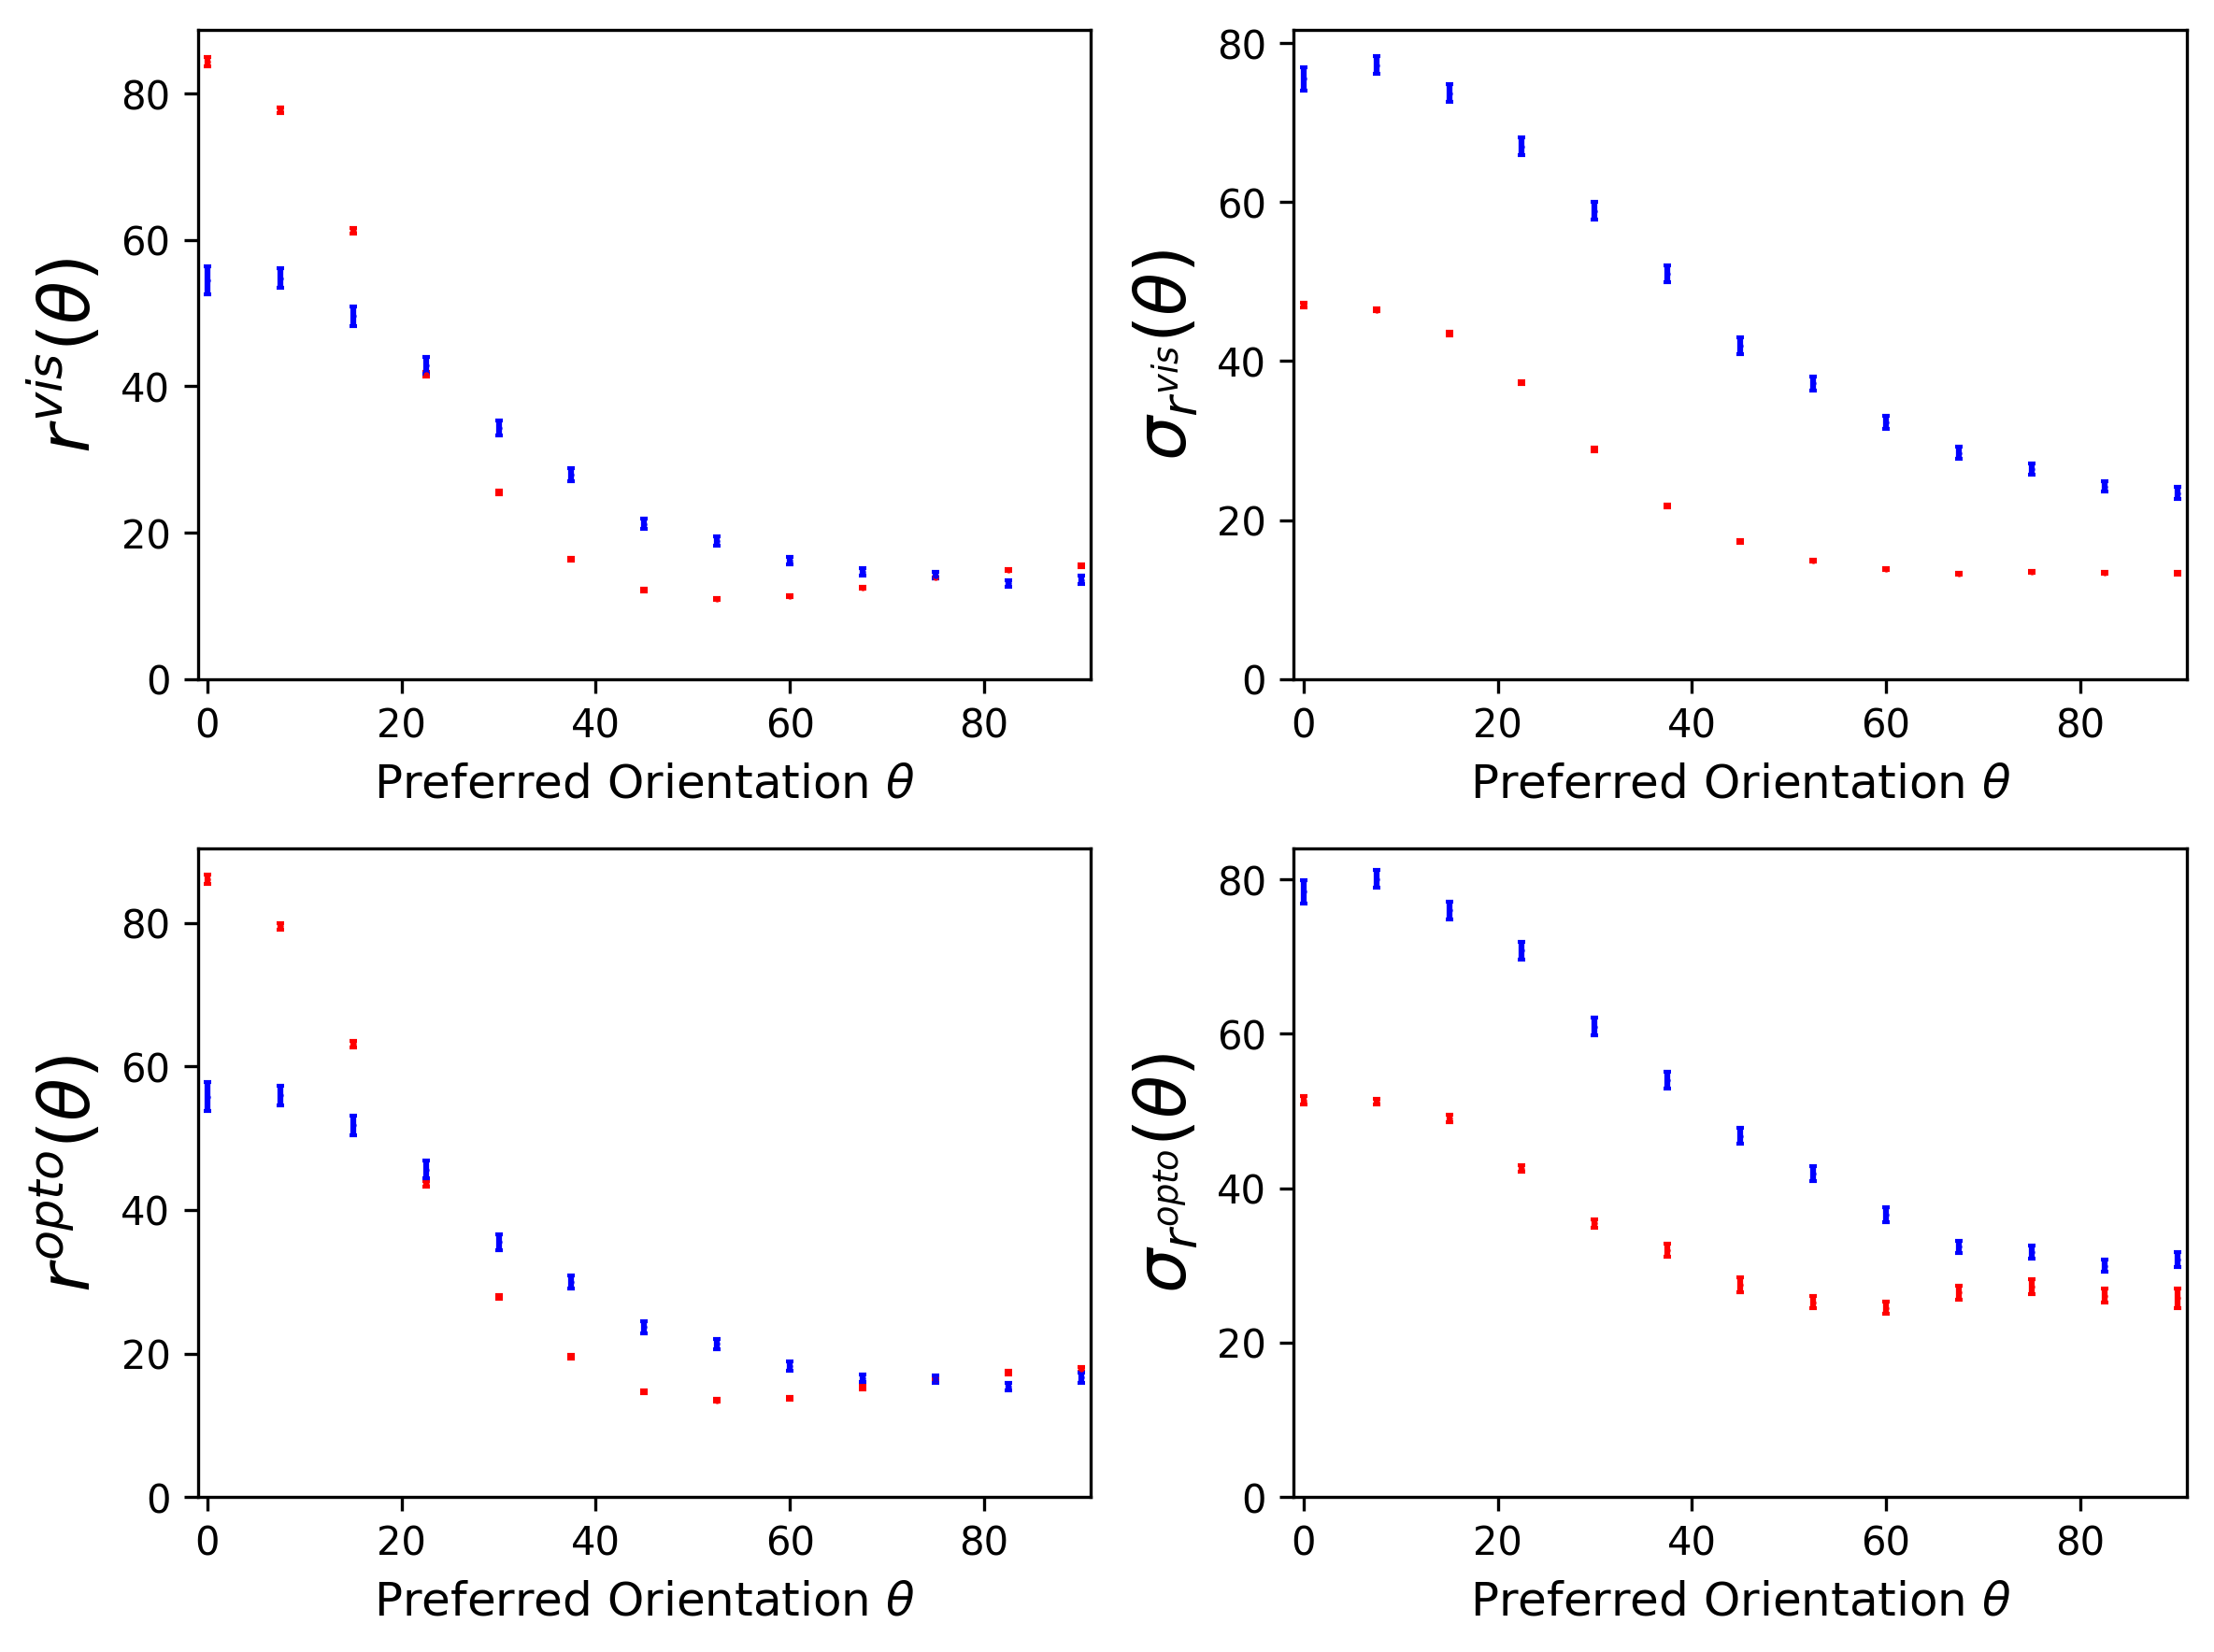

In [172]:
fig,axs = plt.subplots(2,2,figsize=(8,6),dpi=300,sharex=False,sharey=False)
axs[0,0].set_xlim(-1,91)
axs[0,1].set_xlim(-1,91)
axs[1,0].set_xlim(-1,91)
axs[1,1].set_xlim(-1,91)

# axs[0,0].plot(θs,rbEs,c='r',ls='-')
# axs[0,0].plot(θs,rbIs,c='b',ls='-')
# axs[1,0].plot(θs,roEs,c='r',ls='-')
# axs[1,0].plot(θs,roIs,c='b',ls='-')

# axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
# axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')
# axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroEs-roEs**2)),c='r',ls='-')
# axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroIs-roIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roE_mean[:,0],roE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roI_mean[:,0],roI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1)

plot_data_err_bar(axs[0,1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roE_std[:,0],roE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roI_std[:,0],roI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)
axs[0,1].set_ylim(0,None)
axs[1,0].set_ylim(0,None)
axs[1,1].set_ylim(0,None)

axs[0,0].set_ylabel(r'$r^{vis}(\theta)$',fontsize=18)
axs[1,0].set_ylabel(r'$r^{opto}(\theta)$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{r^{vis}}(\theta)$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{r^{opto}}(\theta)$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

fig.tight_layout()
# fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

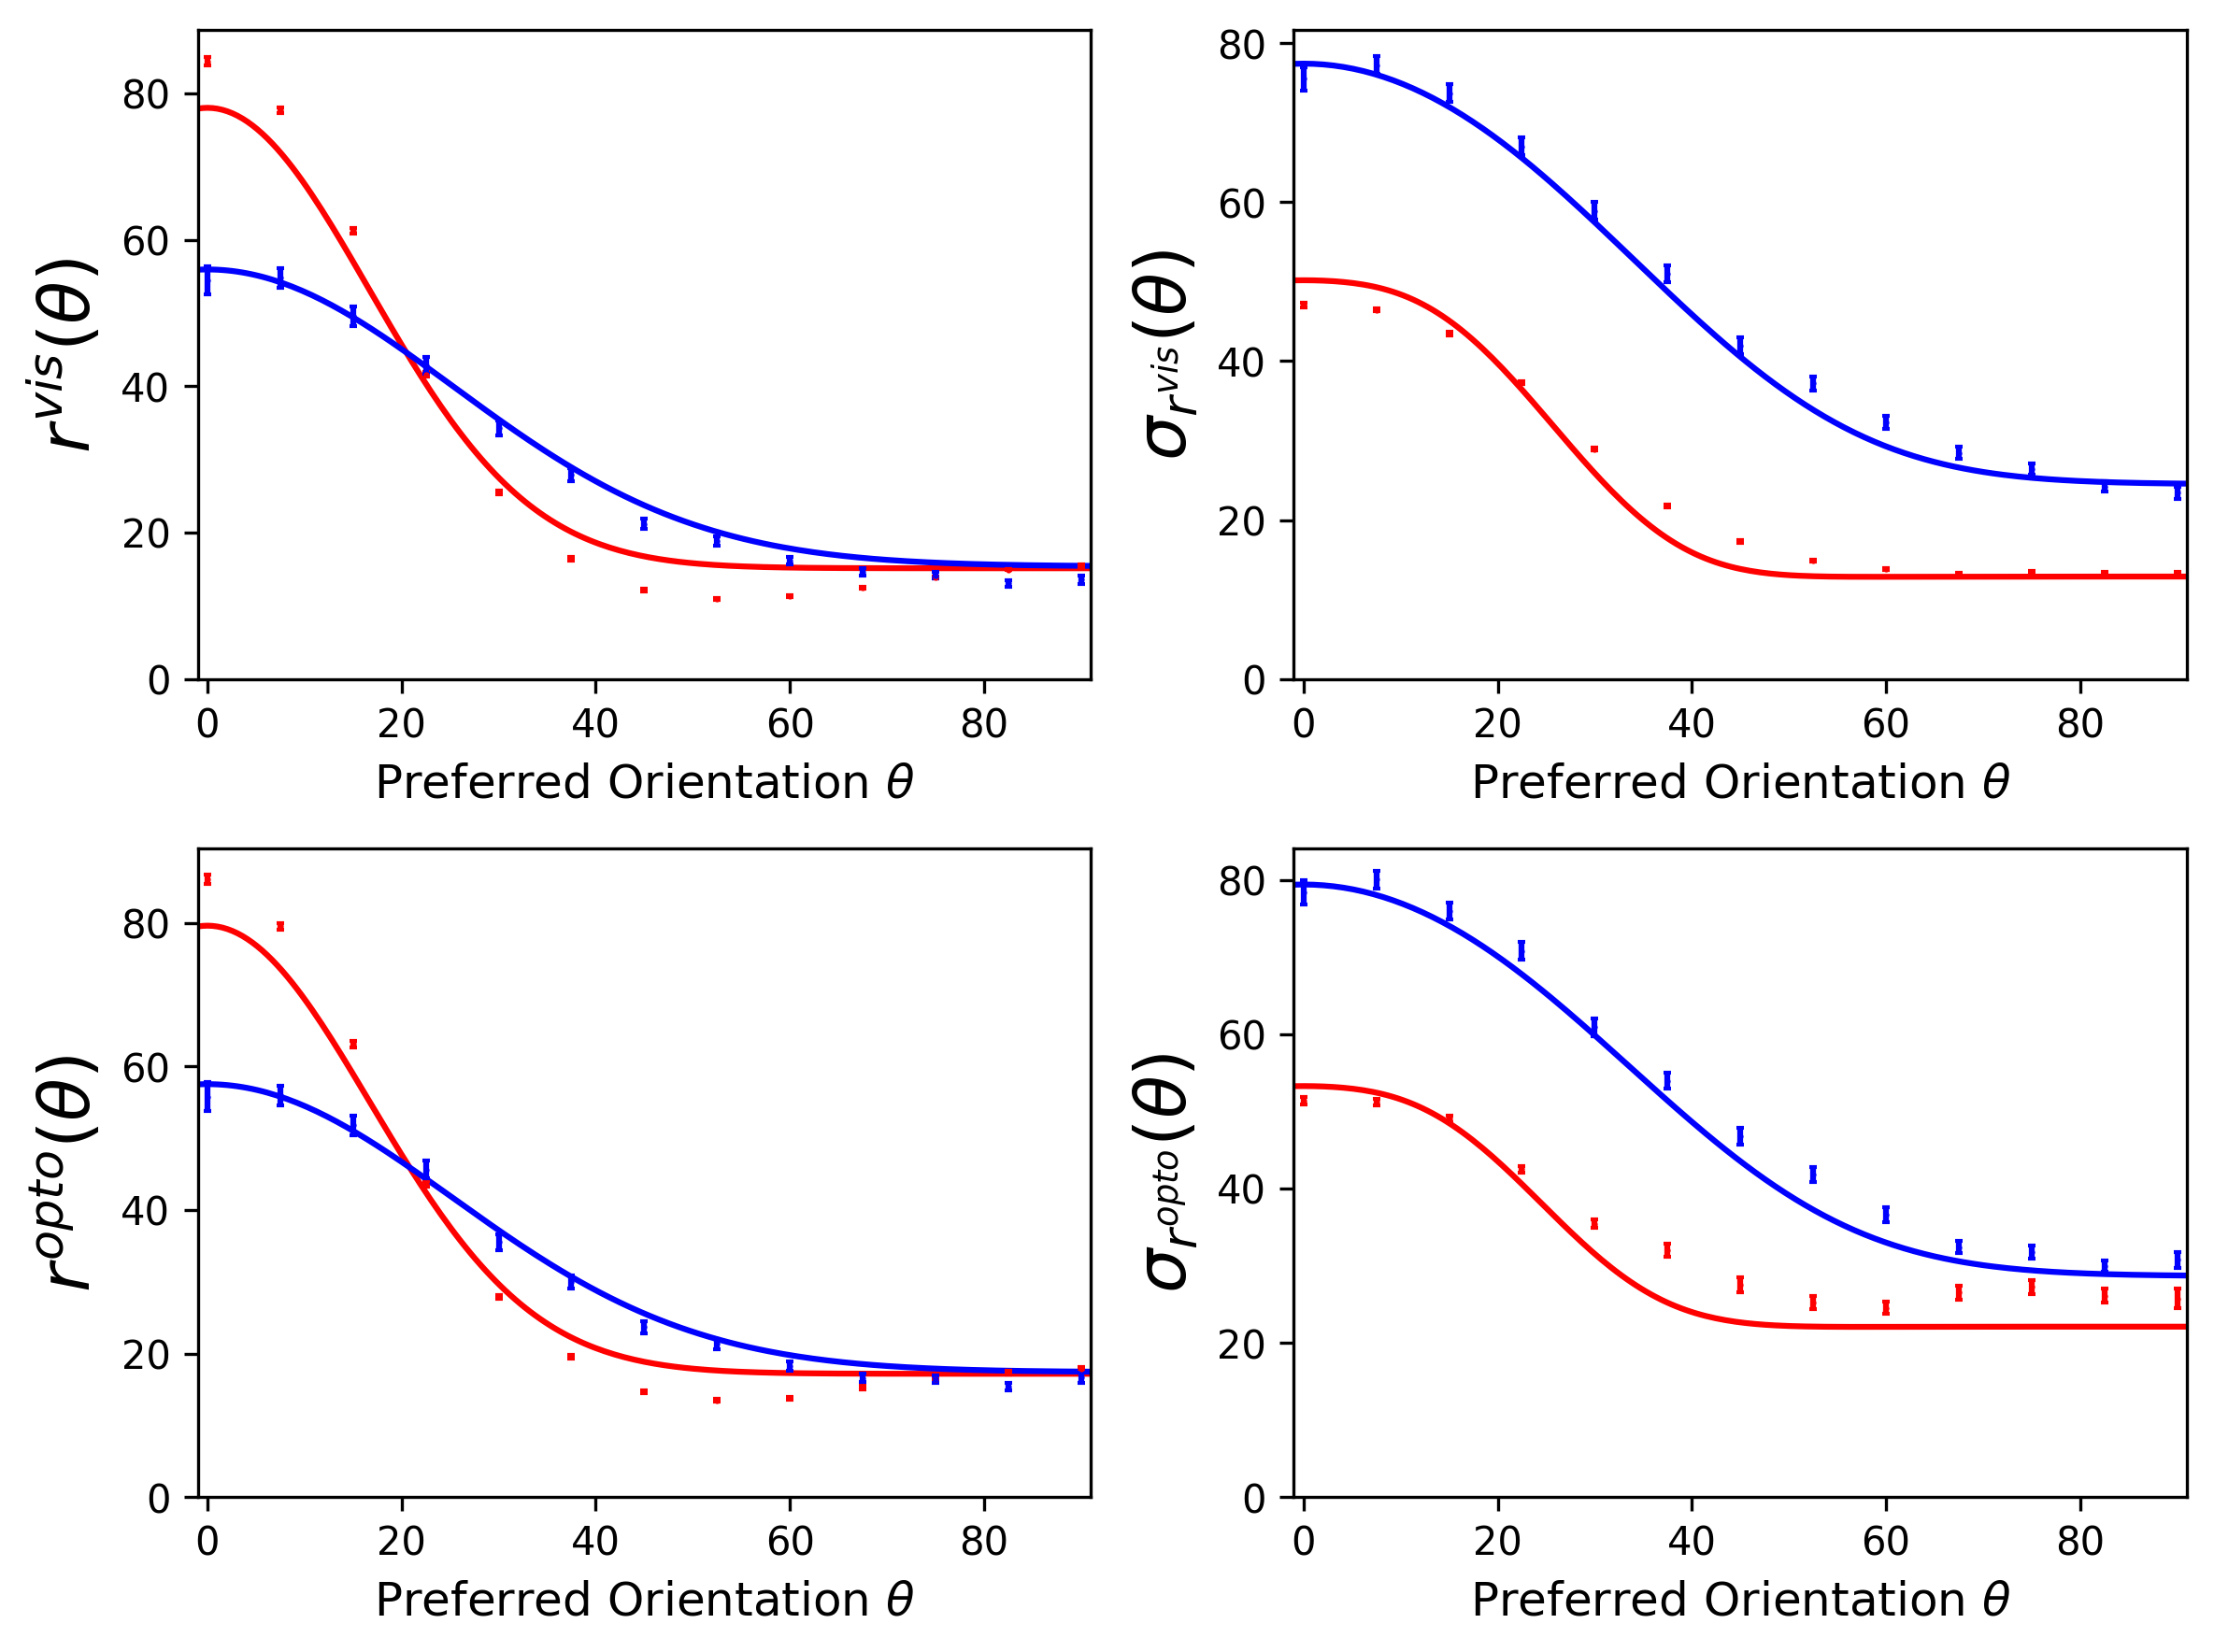

In [173]:
fig,axs = plt.subplots(2,2,figsize=(8,6),dpi=300,sharex=False,sharey=False)
axs[0,0].set_xlim(-1,91)
axs[0,1].set_xlim(-1,91)
axs[1,0].set_xlim(-1,91)
axs[1,1].set_xlim(-1,91)

axs[0,0].plot(θs,rbEs,c='r',ls='-')
axs[0,0].plot(θs,rbIs,c='b',ls='-')
axs[1,0].plot(θs,roEs,c='r',ls='-')
axs[1,0].plot(θs,roIs,c='b',ls='-')

axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroEs-roEs**2)),c='r',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroIs-roIs**2)),c='b',ls='-')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roE_mean[:,0],roE_mean[:,1],
                  c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roI_mean[:,0],roI_mean[:,1],
                  c='blue',ls='',marker='.',ms=1,capsize=1)

plot_data_err_bar(axs[0,1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roE_std[:,0],roE_std[:,1],
                   c='red',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roI_std[:,0],roI_std[:,1],
                   c='blue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)
axs[0,1].set_ylim(0,None)
axs[1,0].set_ylim(0,None)
axs[1,1].set_ylim(0,None)

axs[0,0].set_ylabel(r'$r^{vis}(\theta)$',fontsize=18)
axs[1,0].set_ylabel(r'$r^{opto}(\theta)$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{r^{vis}}(\theta)$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{r^{opto}}(\theta)$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

fig.tight_layout()
fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

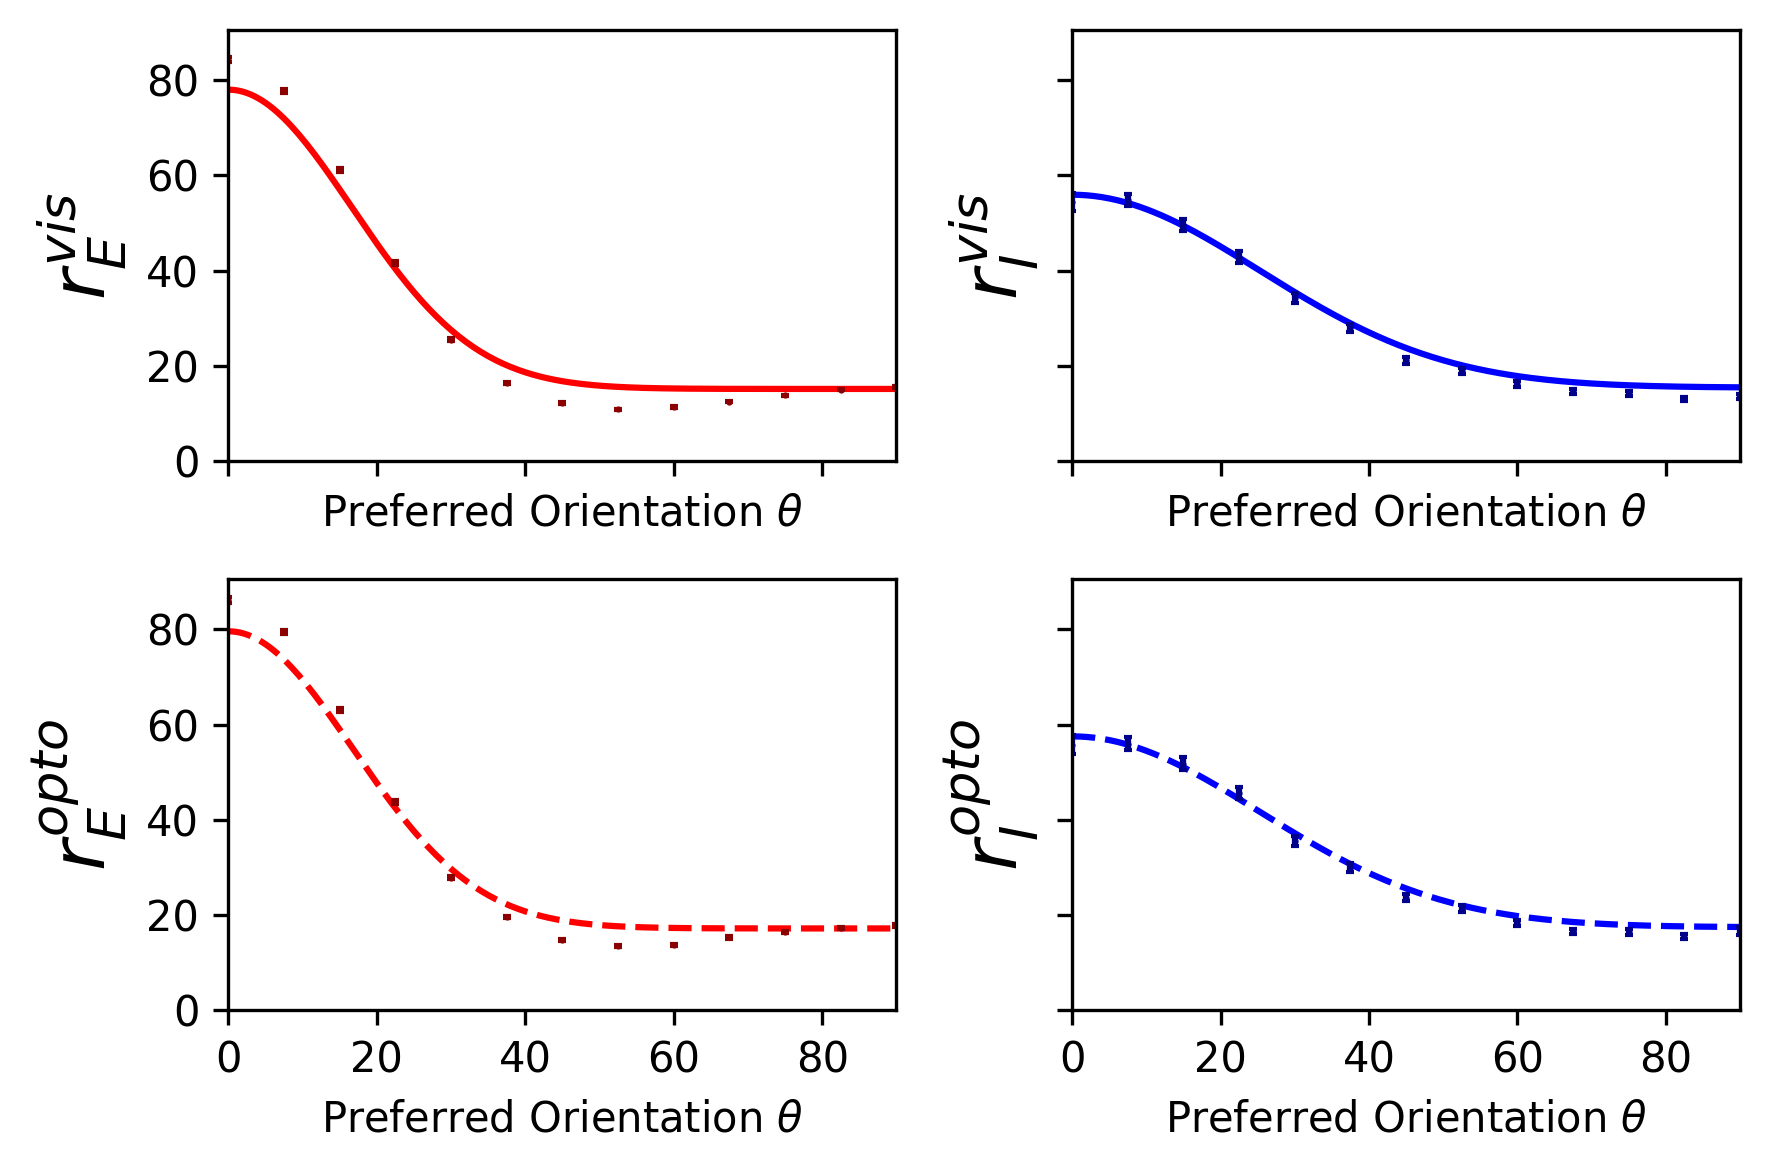

In [124]:
fig,axs = plt.subplots(2,2,figsize=(6,4),dpi=300,sharex=True,sharey=True)
axs[0,0].set_xlim(0,90)

axs[0,0].plot(θs,rbEs,c='r',ls='-')
axs[0,1].plot(θs,rbIs,c='b',ls='-')
axs[1,0].plot(θs,roEs,c='r',ls='--')
axs[1,1].plot(θs,roIs,c='b',ls='--')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roE_mean[:,0],roE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roI_mean[:,0],roI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)

axs[0,0].set_ylabel(r'$r_E^{vis}$',fontsize=18)
axs[0,1].set_ylabel(r'$r_I^{vis}$',fontsize=18)
axs[1,0].set_ylabel(r'$r_E^{opto}$',fontsize=18)
axs[1,1].set_ylabel(r'$r_I^{opto}$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$')
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$')
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$')
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$')

fig.tight_layout()
fig.savefig('./../plots'+'/mft_mean_rates'+'.pdf', bbox_inches='tight')

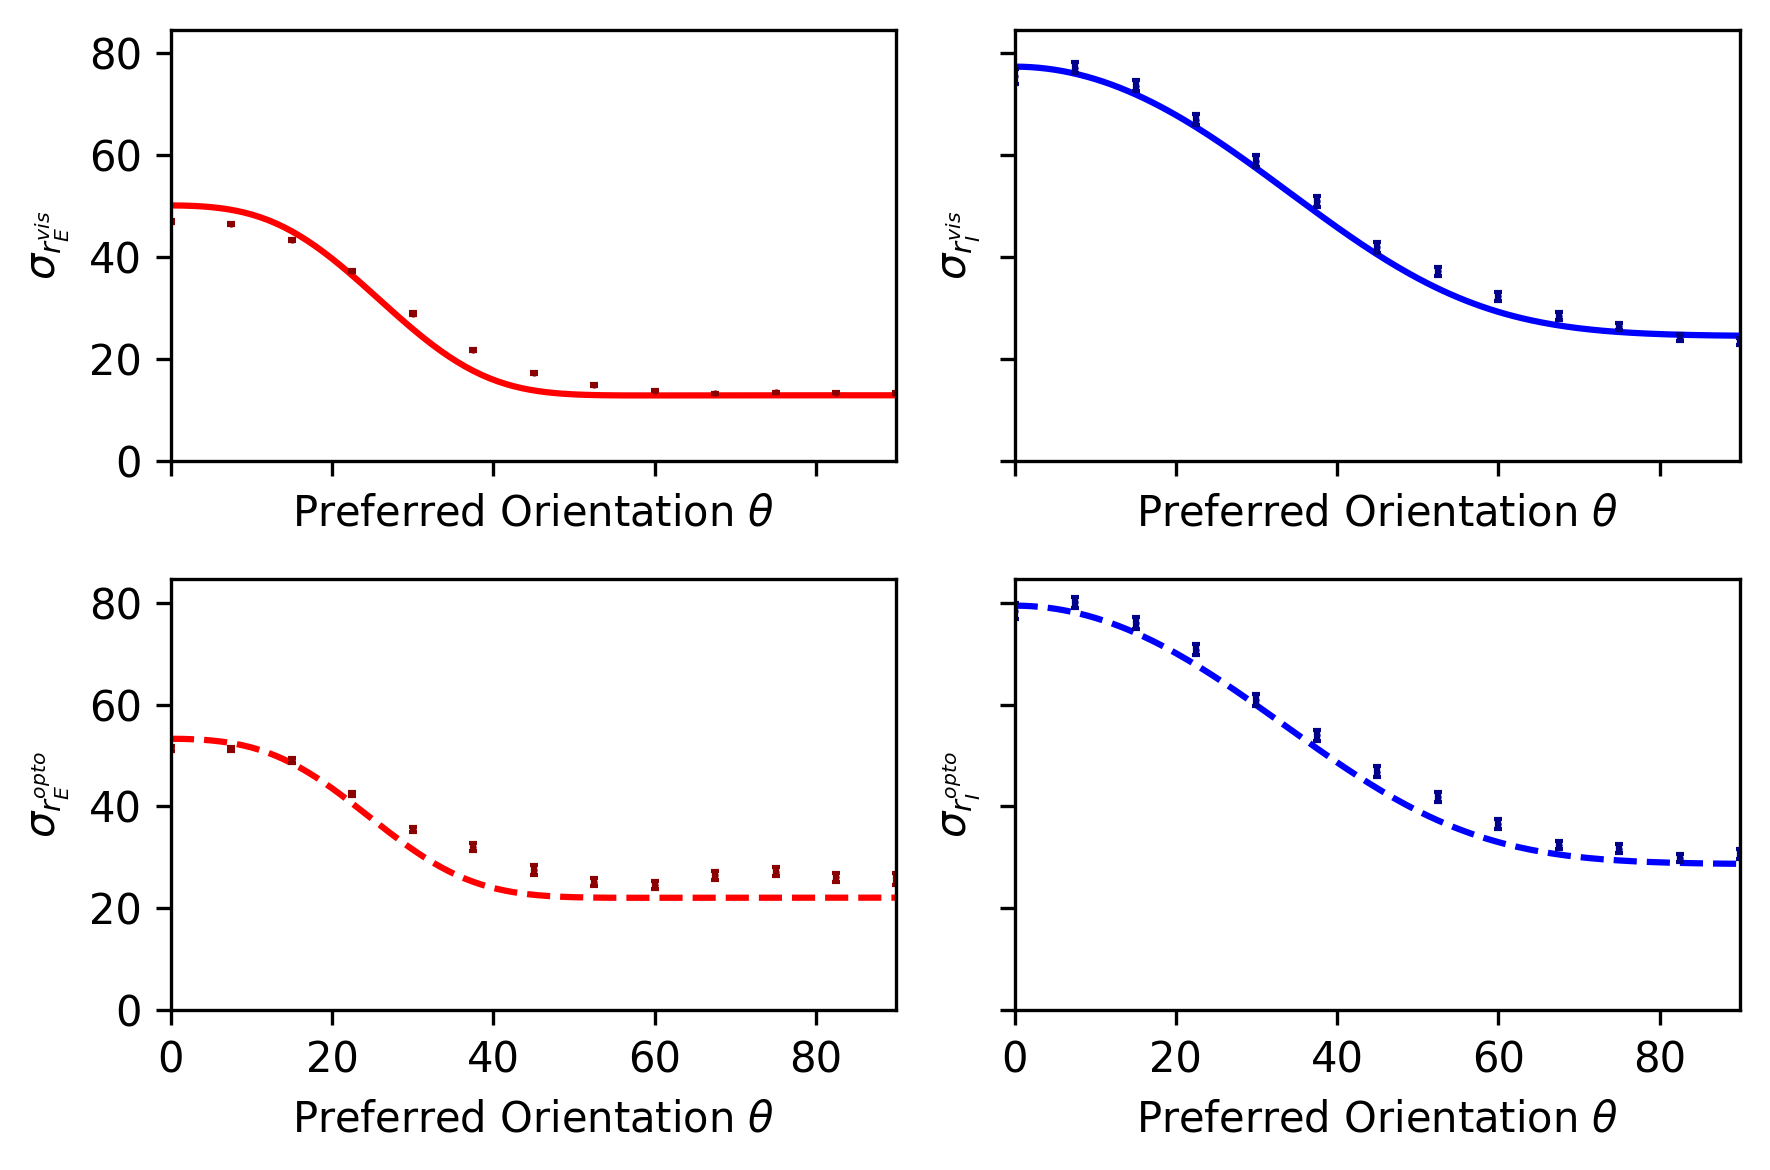

In [100]:
fig,axs = plt.subplots(2,2,figsize=(6,4),dpi=300,sharex=True,sharey=True)
axs[0,0].set_xlim(0,90)

axs[0,0].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')
axs[1,0].plot(θs,np.sqrt(np.maximum(0,CroEs-roEs**2)),c='r',ls='--')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroIs-roIs**2)),c='b',ls='--')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roE_std[:,0],roE_std[:,1],
                   c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roI_std[:,0],roI_std[:,1],
                   c='darkblue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)

axs[0,0].set_ylabel(r'$\sigma_{r_E^{vis}}$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{r_I^{vis}}$',fontsize=18)
axs[1,0].set_ylabel(r'$\sigma_{r_E^{opto}}$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{r_I^{opto}}$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$')
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$')
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$')
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$')

fig.tight_layout()
fig.savefig('./../plots'+'/mft_std_rates'+'.pdf', bbox_inches='tight')

In [17]:
sCdr = [25.34219748, 29.59130058]
Cdrb = [373.13646655, 407.32434429]
Cdrp = [ 645.72995098, 1235.55566402]

drEs = roEs - rbEs
drIs = roIs - rbIs

CdrEs = halfgauss(θs,Cdrp[0]-Cdrb[0],sCdr[0],Cdrb[0])
CdrIs = halfgauss(θs,Cdrp[1]-Cdrb[1],sCdr[1],Cdrb[1])

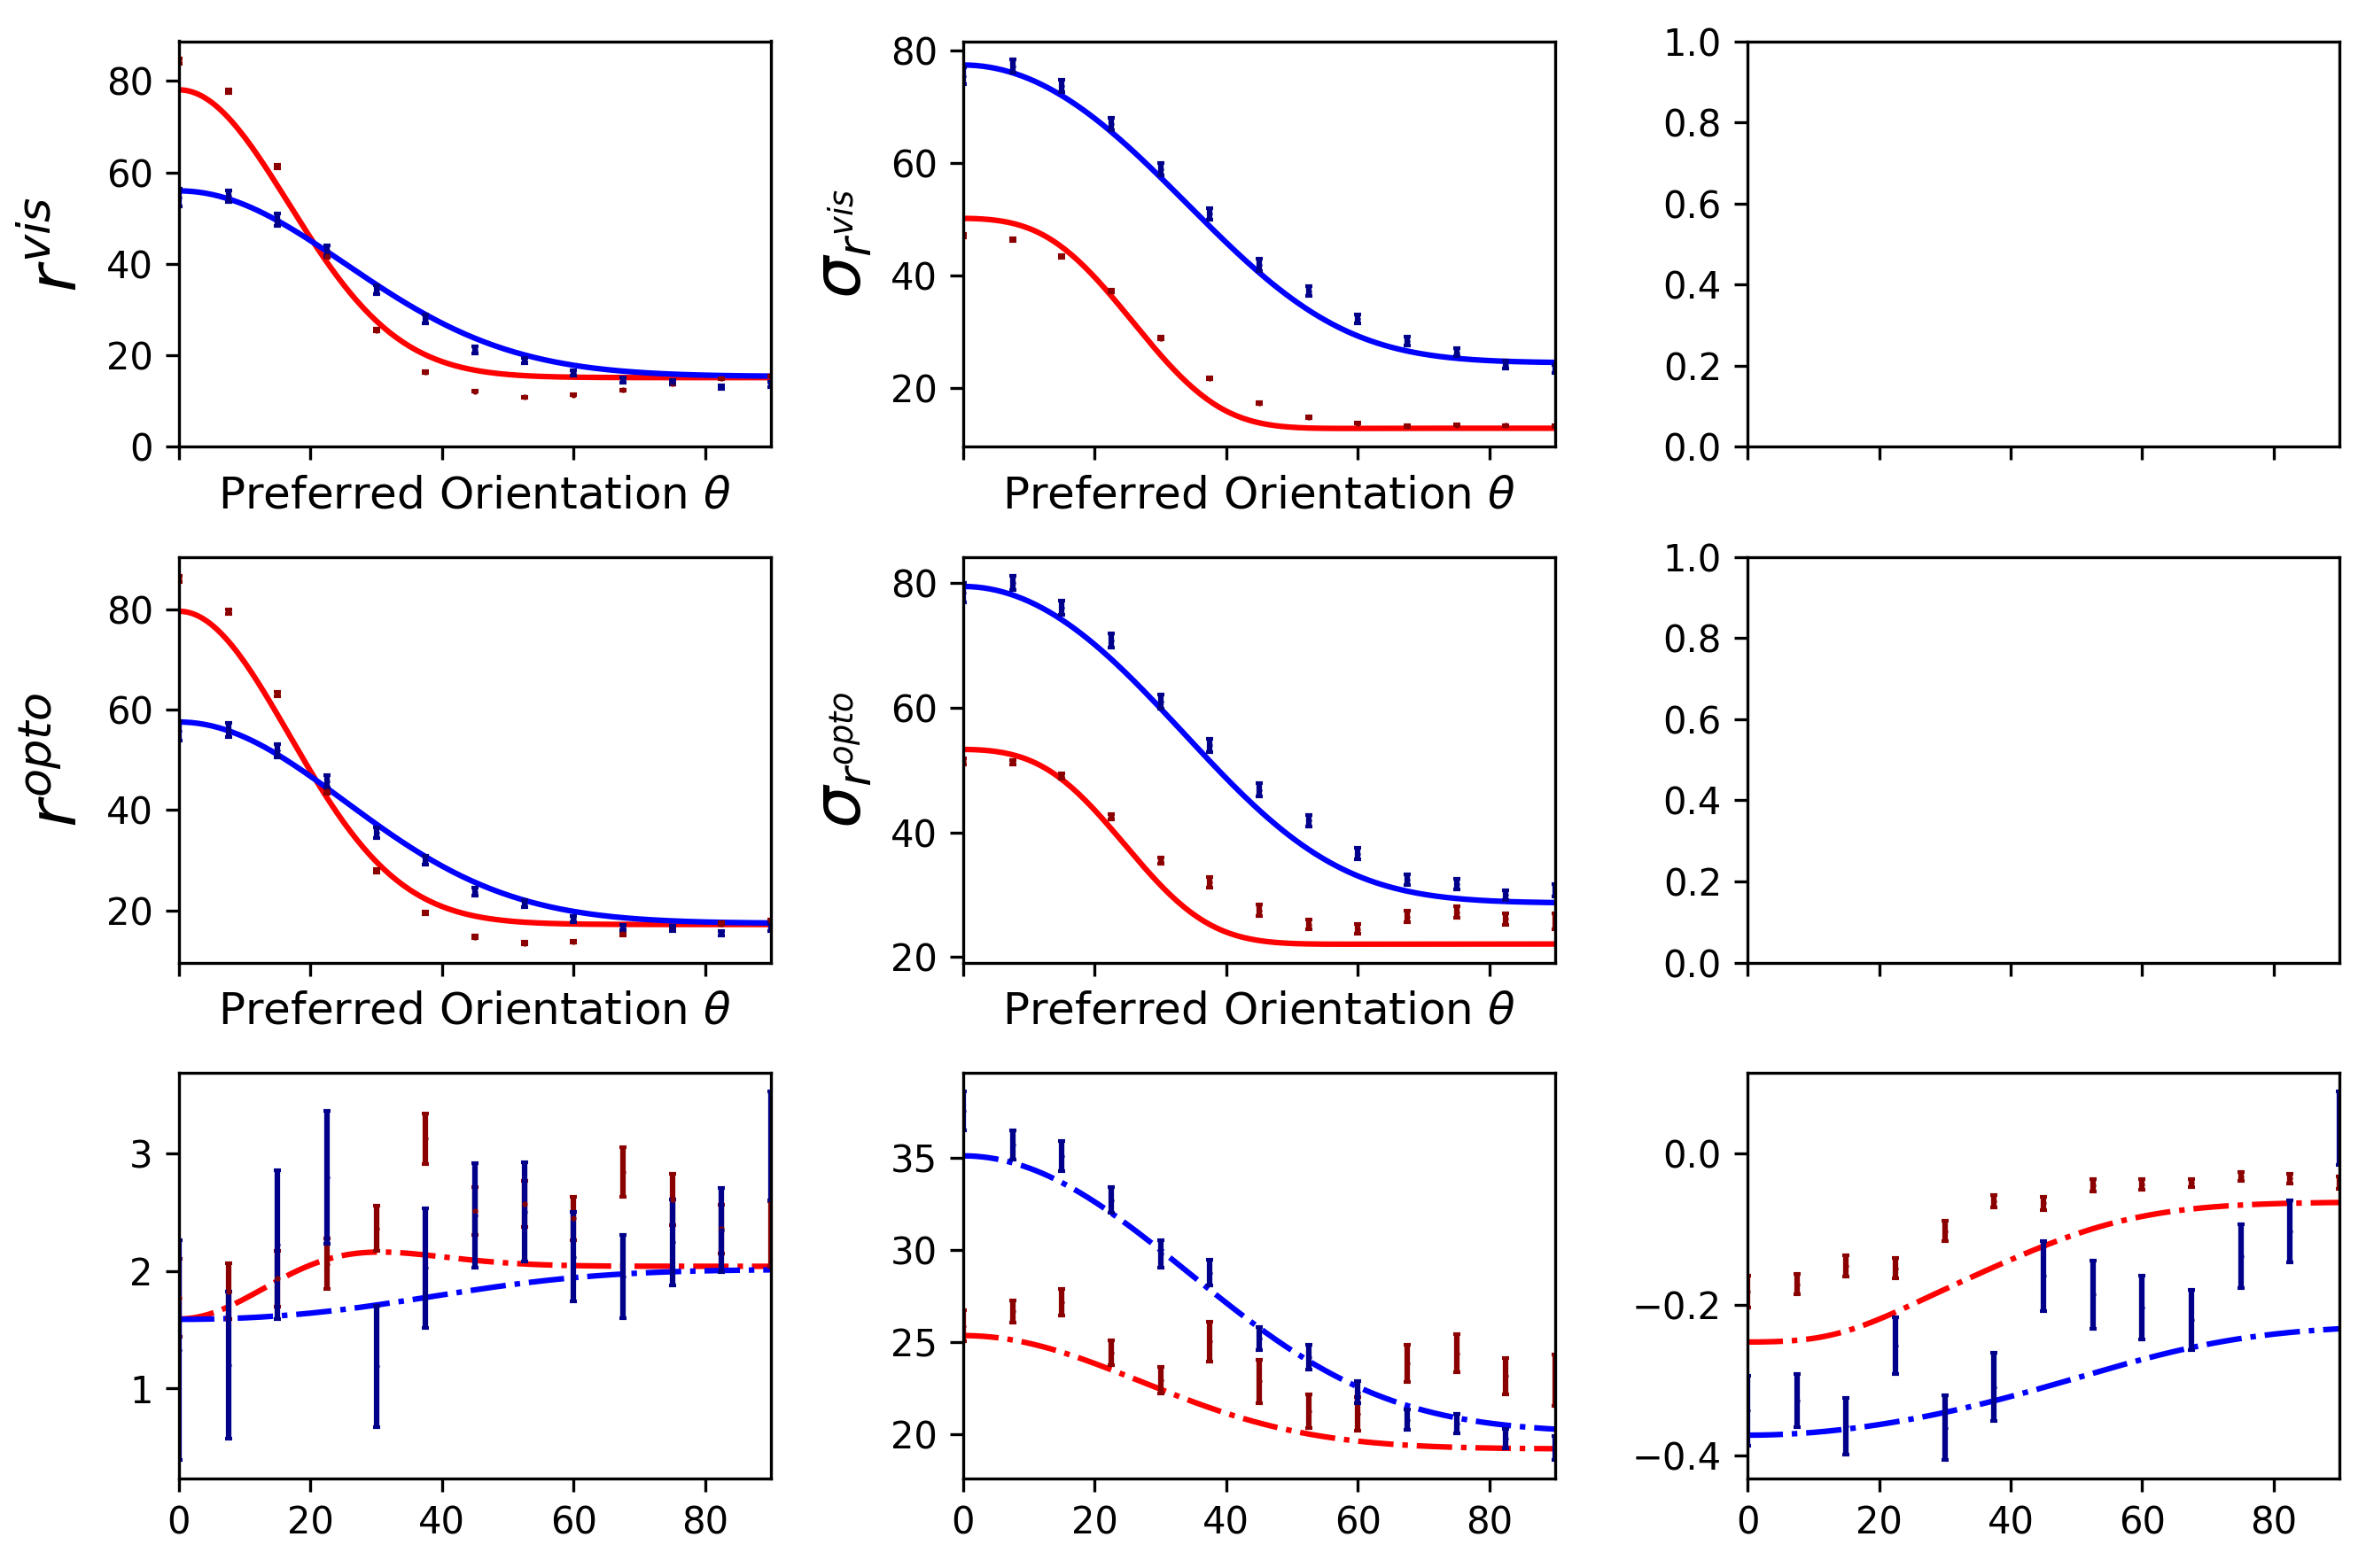

In [130]:
fig,axs = plt.subplots(3,3,figsize=(9,6),dpi=300,sharex=True)
axs[0,0].set_xlim(0,90)

axs[0,0].plot(θs,rbEs,c='r',ls='-')
axs[0,0].plot(θs,rbIs,c='b',ls='-')
axs[1,0].plot(θs,roEs,c='r',ls='-')
axs[1,0].plot(θs,roIs,c='b',ls='-')
axs[2,0].plot(θs,drEs,c='r',ls='-.')
axs[2,0].plot(θs,drIs,c='b',ls='-.')

axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbEs-rbEs**2)),c='r',ls='-')
axs[0,1].plot(θs,np.sqrt(np.maximum(0,CrbIs-rbIs**2)),c='b',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroEs-roEs**2)),c='r',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CroIs-roIs**2)),c='b',ls='-')
axs[2,1].plot(θs,np.sqrt(np.maximum(0,CdrEs-drEs**2)),c='r',ls='-.')
axs[2,1].plot(θs,np.sqrt(np.maximum(0,CdrIs-drIs**2)),c='b',ls='-.')

axs[2,2].plot(θs,0.5*(np.maximum(0,CroEs-roEs**2)-np.maximum(0,CrbEs-rbEs**2))/\
              (np.maximum(0,CdrEs-drEs**2)) - 0.5,c='r',ls='-.')
axs[2,2].plot(θs,0.5*(np.maximum(0,CroIs-roIs**2)-np.maximum(0,CrbIs-rbIs**2))/\
              (np.maximum(0,CdrIs-drIs**2)) - 0.5,c='b',ls='-.')

plot_data_err_bar(axs[0,0],ori_bounds,rbE_mean[:,0],rbE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,0],ori_bounds,rbI_mean[:,0],rbI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roE_mean[:,0],roE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,roI_mean[:,0],roI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[2,0],ori_bounds,rdE_mean[:,0],rdE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[2,0],ori_bounds,rdI_mean[:,0],rdI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)

plot_data_err_bar(axs[0,1],ori_bounds,rbE_std[:,0],rbE_std[:,1],
                   c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rbI_std[:,0],rbI_std[:,1],
                   c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roE_std[:,0],roE_std[:,1],
                   c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,roI_std[:,0],roI_std[:,1],
                   c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[2,1],ori_bounds,rdE_std[:,0],rdE_std[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[2,1],ori_bounds,rdI_std[:,0],rdI_std[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)

plot_data_err_bar(axs[2,2],ori_bounds,rdE_rho[:,0],rdE_rho[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[2,2],ori_bounds,rdI_rho[:,0],rdI_rho[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)

axs[0,0].set_ylabel(r'$r^{vis}$',fontsize=18)
axs[1,0].set_ylabel(r'$r^{opto}$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{r^{vis}}$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{r^{opto}}$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

fig.tight_layout()
fig.savefig('./../plots'+'/mft_mean_std_rates'+'.pdf', bbox_inches='tight')

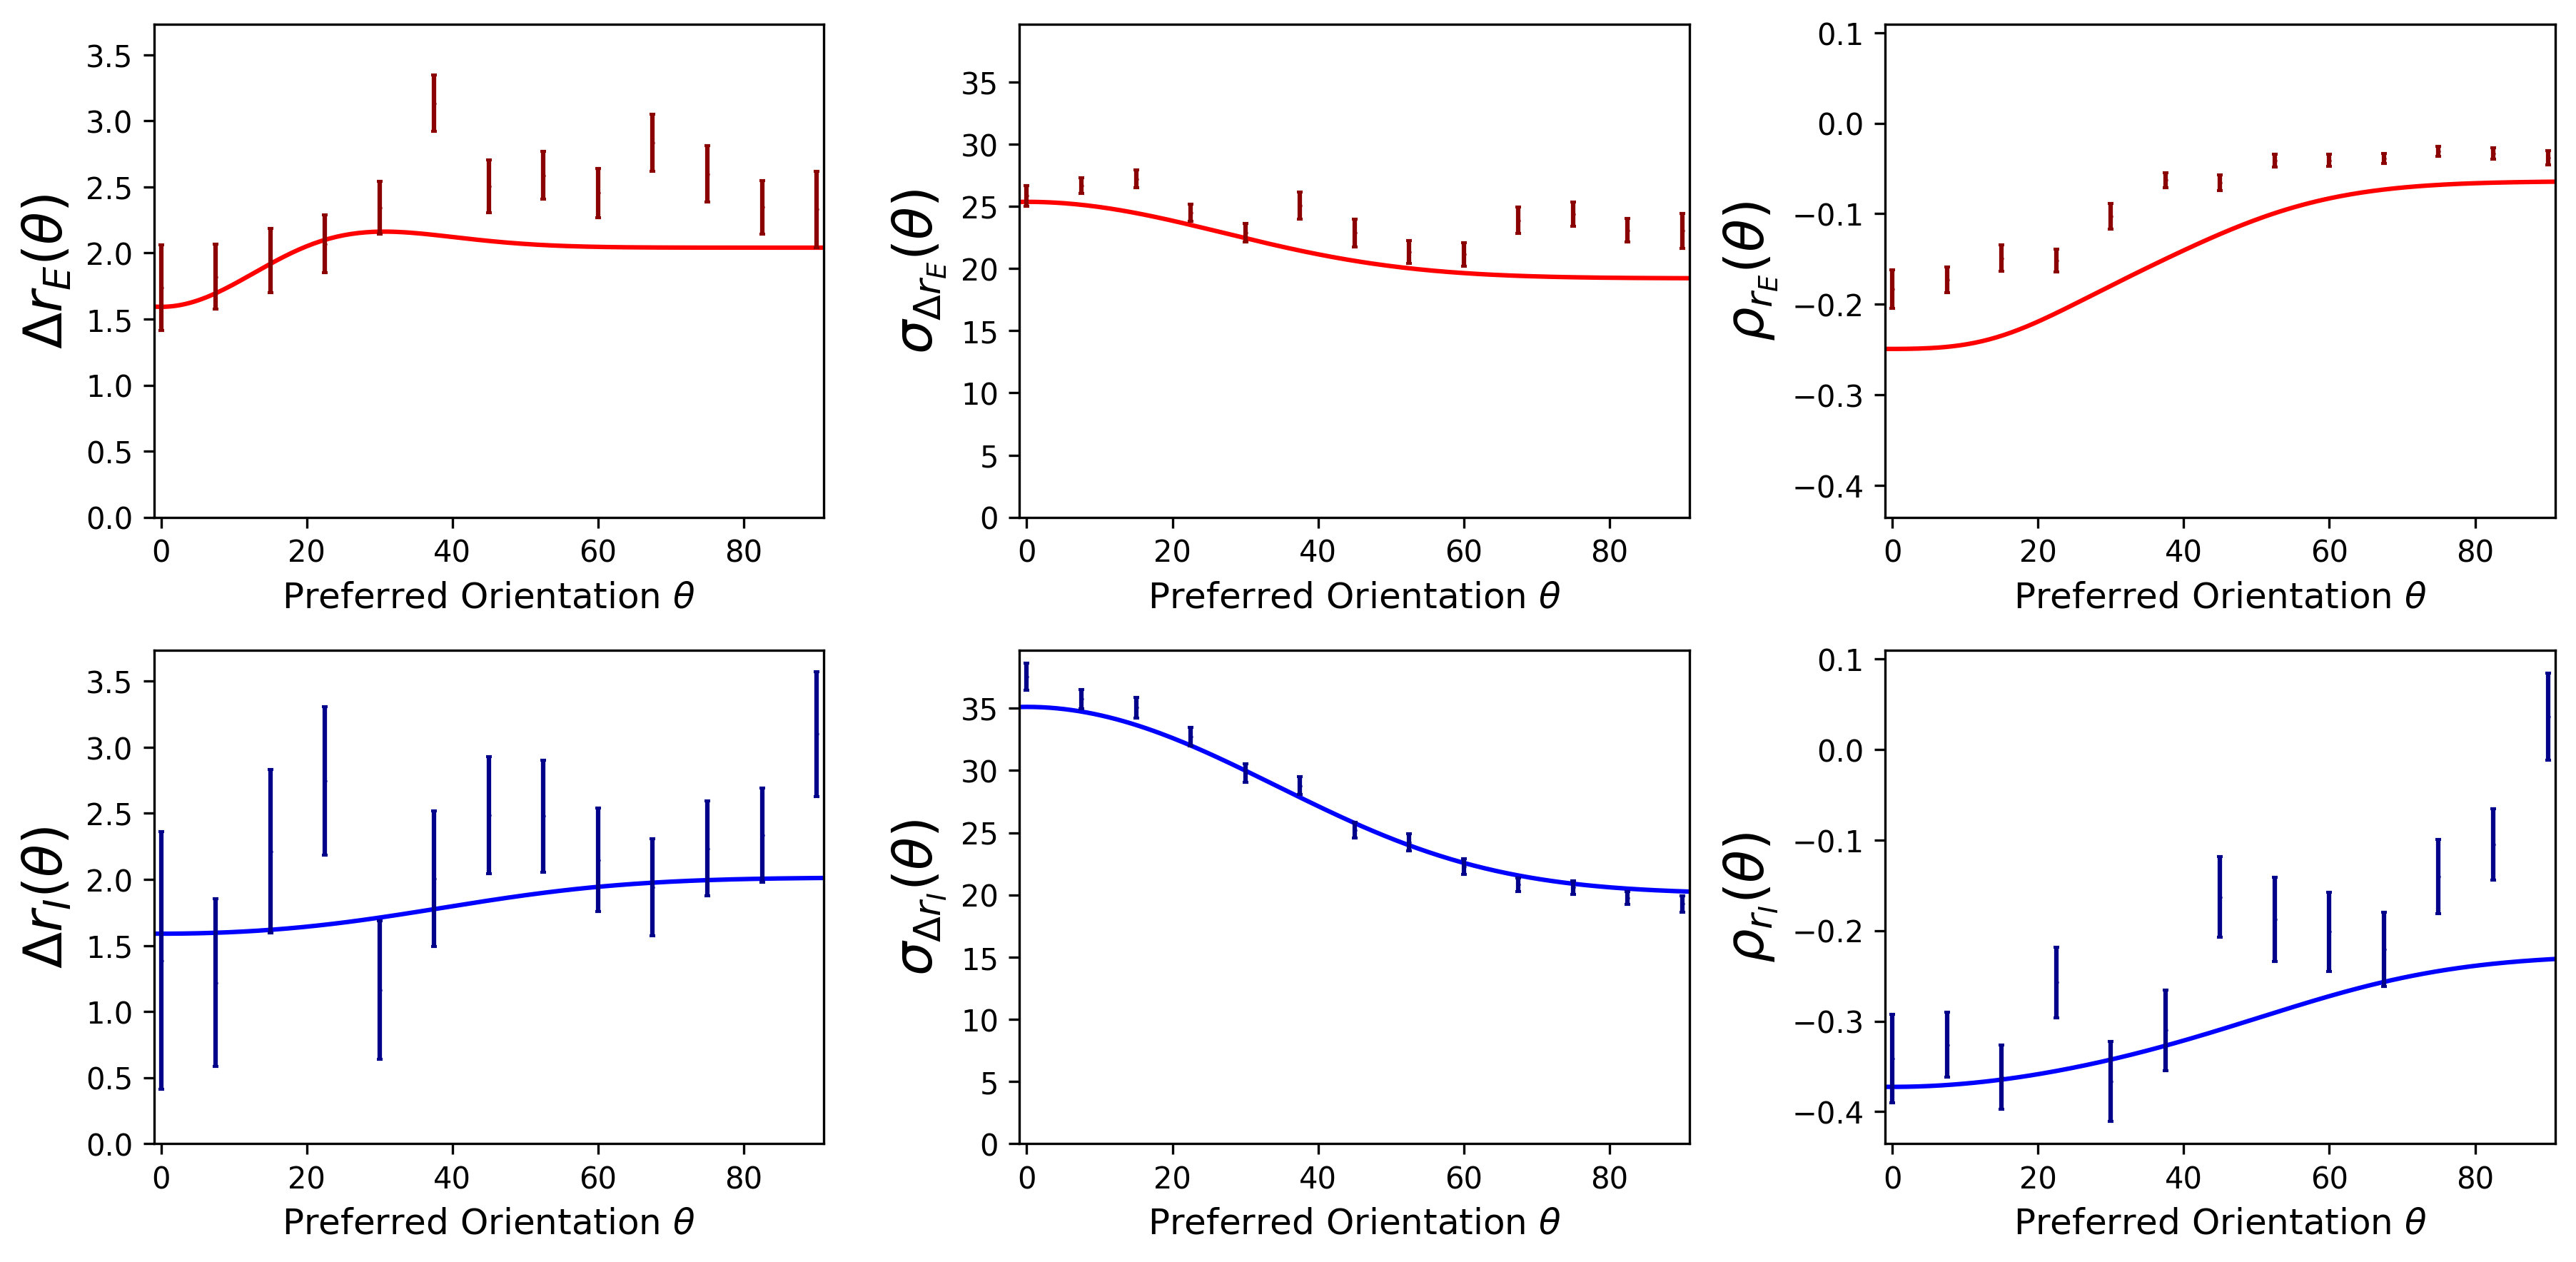

In [18]:
fig,axs = plt.subplots(2,3,figsize=(12,6),dpi=300,sharex=False,sharey='col')
axs[0,0].set_xlim(-1,91)
axs[0,1].set_xlim(-1,91)
axs[0,2].set_xlim(-1,91)
axs[1,0].set_xlim(-1,91)
axs[1,1].set_xlim(-1,91)
axs[1,2].set_xlim(-1,91)

axs[0,0].plot(θs,drEs,c='r',ls='-')
axs[1,0].plot(θs,drIs,c='b',ls='-')
axs[0,1].plot(θs,np.sqrt(np.maximum(0,CdrEs-drEs**2)),c='r',ls='-')
axs[1,1].plot(θs,np.sqrt(np.maximum(0,CdrIs-drIs**2)),c='b',ls='-')
axs[0,2].plot(θs,0.5*(np.maximum(0,CroEs-roEs**2)-np.maximum(0,CrbEs-rbEs**2))/\
              (np.maximum(0,CdrEs-drEs**2)) - 0.5,c='r',ls='-')
axs[1,2].plot(θs,0.5*(np.maximum(0,CroIs-roIs**2)-np.maximum(0,CrbIs-rbIs**2))/\
              (np.maximum(0,CdrIs-drIs**2)) - 0.5,c='b',ls='-')

plot_data_err_bar(axs[0,0],ori_bounds,rdE_mean[:,0],rdE_mean[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,0],ori_bounds,rdI_mean[:,0],rdI_mean[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,1],ori_bounds,rdE_std[:,0],rdE_std[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,1],ori_bounds,rdI_std[:,0],rdI_std[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[0,2],ori_bounds,rdE_rho[:,0],rdE_rho[:,1],
                  c='darkred',ls='',marker='.',ms=1,capsize=1)
plot_data_err_bar(axs[1,2],ori_bounds,rdI_rho[:,0],rdI_rho[:,1],
                  c='darkblue',ls='',marker='.',ms=1,capsize=1)

axs[0,0].set_ylim(0,None)
axs[0,1].set_ylim(0,None)
# axs[0,2].set_ylim(0,None)
axs[1,0].set_ylim(0,None)
axs[1,1].set_ylim(0,None)
# axs[1,2].set_ylim(0,None)

axs[0,0].set_ylabel(r'$\Delta r_E(\theta)$',fontsize=18)
axs[1,0].set_ylabel(r'$\Delta r_I(\theta)$',fontsize=18)
axs[0,1].set_ylabel(r'$\sigma_{\Delta r_E}(\theta)$',fontsize=18)
axs[1,1].set_ylabel(r'$\sigma_{\Delta r_I}(\theta)$',fontsize=18)
axs[0,2].set_ylabel(r'$\rho_{r_E}(\theta)$',fontsize=18)
axs[1,2].set_ylabel(r'$\rho_{r_I}(\theta)$',fontsize=18)

axs[0,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,0].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,1].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[0,2].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)
axs[1,2].set_xlabel(r'Preferred Orientation $\theta$',fontsize=12)

fig.tight_layout()
fig.savefig('./../plots'+'/mft_diff_rates'+'.pdf', bbox_inches='tight')

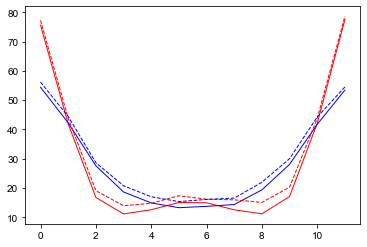

In [28]:
plt.plot(rbEs.reshape((len(seeds),-1,1200//12,net.NC[0])).mean((0,-2,-1)),'r-')
plt.plot(rbIs.reshape((len(seeds),-1,1200//12,net.NC[1])).mean((0,-2,-1)),'b-')
plt.plot(roEs.reshape((len(seeds),-1,1200//12,net.NC[0])).mean((0,-2,-1)),'r--')
plt.plot(roIs.reshape((len(seeds),-1,1200//12,net.NC[1])).mean((0,-2,-1)),'b--')

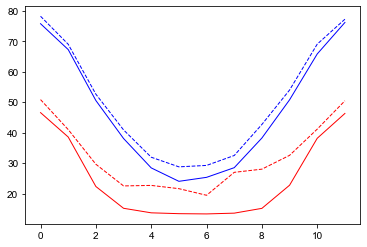

In [29]:
plt.plot(rbEs.reshape((len(seeds),-1,1200//12,net.NC[0])).std((0,-2,-1)),'r-')
plt.plot(rbIs.reshape((len(seeds),-1,1200//12,net.NC[1])).std((0,-2,-1)),'b-')
plt.plot(roEs.reshape((len(seeds),-1,1200//12,net.NC[0])).std((0,-2,-1)),'r--')
plt.plot(roIs.reshape((len(seeds),-1,1200//12,net.NC[1])).std((0,-2,-1)),'b--')

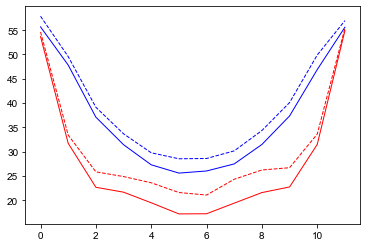

In [30]:
plt.plot(np.sqrt((rbEs-rbEs.mean())**2).reshape((len(seeds),-1,1200//12,net.NC[0])).mean((0,-2,-1)),'r-')
plt.plot(np.sqrt((rbIs-rbIs.mean())**2).reshape((len(seeds),-1,1200//12,net.NC[1])).mean((0,-2,-1)),'b-')
plt.plot(np.sqrt((roEs-roEs.mean())**2).reshape((len(seeds),-1,1200//12,net.NC[0])).mean((0,-2,-1)),'r--')
plt.plot(np.sqrt((roIs-roIs.mean())**2).reshape((len(seeds),-1,1200//12,net.NC[1])).mean((0,-2,-1)),'b--')

In [5]:
cx = 1400
cy = 580
r = 200

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[1400.         1541.42135624 1600.         1541.42135624 1400.
  1258.57864376 1200.         1258.57864376]
 [ 380.          438.57864376  580.          721.42135624  780.
   721.42135624  580.          438.57864376]]


In [6]:
cx = 1400
cy = 580
r = 280

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[1400.         1597.98989873 1680.         1597.98989873 1400.
  1202.01010127 1120.         1202.01010127]
 [ 300.          382.01010127  580.          777.98989873  860.
   777.98989873  580.          382.01010127]]


In [111]:
cx = 910
cy = 505
r = 400

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[ 910.         1192.84271247 1310.         1192.84271247  910.
   627.15728753  510.          627.15728753]
 [ 105.          222.15728753  505.          787.84271247  905.
   787.84271247  505.          222.15728753]]


In [112]:
cx = 910
cy = 505
r = 250

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[ 910.        1086.7766953 1160.        1086.7766953  910.
   733.2233047  660.         733.2233047]
 [ 255.         328.2233047  505.         681.7766953  755.
   681.7766953  505.         328.2233047]]


In [113]:
cx = 910
cy = 505
r = 480

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[ 910.         1249.41125497 1390.         1249.41125497  910.
   570.58874503  430.          570.58874503]
 [  20.          160.58874503  500.          839.41125497  980.
   839.41125497  500.          160.58874503]]


In [120]:
cx = 910
cy = 905
r = 800

print(np.row_stack((cx + r*np.cos((np.arange(16)-4)/16*2*np.pi),cy + r*np.sin((np.arange(16)-4)/16*2*np.pi))))

[[ 910.         1216.14674589 1475.68542495 1649.10362601 1710.
  1649.10362601 1475.68542495 1216.14674589  910.          603.85325411
   344.31457505  170.89637399  110.          170.89637399  344.31457505
   603.85325411]
 [ 105.          165.89637399  339.31457505  598.85325411  905.
  1211.14674589 1470.68542495 1644.10362601 1705.         1644.10362601
  1470.68542495 1211.14674589  905.          598.85325411  339.31457505
   165.89637399]]


In [121]:
cx = 910
cy = 905
r = 650

print(np.row_stack((cx + r*np.cos((np.arange(16)-4)/16*2*np.pi),cy + r*np.sin((np.arange(16)-4)/16*2*np.pi))))

[[ 910.         1158.74423104 1369.61940777 1510.52169613 1560.
  1510.52169613 1369.61940777 1158.74423104  910.          661.25576896
   450.38059223  309.47830387  260.          309.47830387  450.38059223
   661.25576896]
 [ 255.          304.47830387  445.38059223  656.25576896  905.
  1153.74423104 1364.61940777 1505.52169613 1555.         1505.52169613
  1364.61940777 1153.74423104  905.          656.25576896  445.38059223
   304.47830387]]


In [181]:
cx = 910-25
cy = 505
r = 400-25

print(np.row_stack((cx + r*np.cos((np.arange(8)-2)/8*2*np.pi),cy + r*np.sin((np.arange(8)-2)/8*2*np.pi))))

[[ 885.         1150.16504294 1260.         1150.16504294  885.
   619.83495706  510.          619.83495706]
 [ 130.          239.83495706  505.          770.16504294  880.
   770.16504294  505.          239.83495706]]
